### Importing necessary  packages.

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier

import numpy as np, pandas as pd
import os, importlib, sys

module_path = os.path.dirname( os.getcwd()) #Find the directory where we can find the 'Modules' library.
sys.path.append(module_path)

import Modules.Classes as Classes

importlib.reload(Classes) #Reload the custom module to avoid clicking "Restart" every time I have changed "Modules.Classes" file.



<module 'Modules.Classes' from 'c:\\Users\\pawel\\OneDrive\\Życie\\Praca\\Programowanie\\AllGitHubRepositories\\Scientific-collaboration\\Modules\\Classes.py'>

### Defining constants for the models.

In [2]:
dtypes = {
    "Make": "string",  # typ dla ciągów znaków
    "Model": "string",  # typ dla ciągów znaków
    "Vehicle Class": "string",  # typ dla ciągów znaków
    "Engine Size(L)": pd.Float64Dtype(),  # zmiennoprzecinkowy, natywny typ pandas
    "Cylinders":  pd.Int8Dtype(),  # liczba całkowita o małej precyzji
    "Transmission": "string",  # typ dla ciągów znaków
    "Fuel Type": "string",  # typ dla ciągów znaków
    "Fuel Consumption City (L/100 km)": pd.Float64Dtype(),  # zmiennoprzecinkowy
    "Fuel Consumption Hwy (L/100 km)": pd.Float64Dtype(),  # zmiennoprzecinkowy
    "Fuel Consumption Comb (L/100 km)": pd.Float64Dtype(),  # zmiennoprzecinkowy
    "Fuel Consumption Comb (mpg)": pd.Float64Dtype(),  # zmiennoprzecinkowy
    "CO2 Emissions(g/km)": pd.Float64Dtype()  # zmiennoprzecinkowy
}

# Define the dictionary of  ML models we will be training.
Models = {
     "DecTree": DecisionTreeClassifier(criterion="gini", splitter="best", min_samples_split=2), 
  #   "RanFor": RandomForestClassifier(n_estimators=15, criterion='gini'), 
  #   "KNN": KNeighborsClassifier(n_neighbors=5),
  ##   "LogReg": LogisticRegression(max_iter = 200,),
  # "LinReg":Classes.MultiOutputLinearRegression(LinearRegression())
}    

#For each ML model create it's corresponding parameter space.
Models_hipparams = {"DecTree":{"criterion":['gini','entropy'],
                                         "splitter":['best','random'],
                                         "min_samples_split":[2,3],
                                          "min_samples_leaf":[2,3]},
# 
                    #  "RanFor":{"n_estimators":list(range(5, 25, 5)),
                                         "min_samples_split":[2,3],
                                        "min_samples_leaf":[2,3]},
                                       
                 #  "KNN": {"n_neighbors":list(range(1, 10, 2)),
                    #          "p":[1,2]},
                   #          
                  #       "LogReg": {
                   #      "max_iter":[250, 300],
                   #           "penalty":['l2'],
                   #           "solver":['liblinear','newton-cg',],
                              
                   #      },
                  #   "LinReg":{},
                  #           }



### Exploratory Data Analysis (EDA) section.

c:\Users\pawel\OneDrive\Życie\Praca\Programowanie\AllGitHubRepositories\Scientific-collaboration\Modules\Classes.py:400: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  figure = plt.figure()


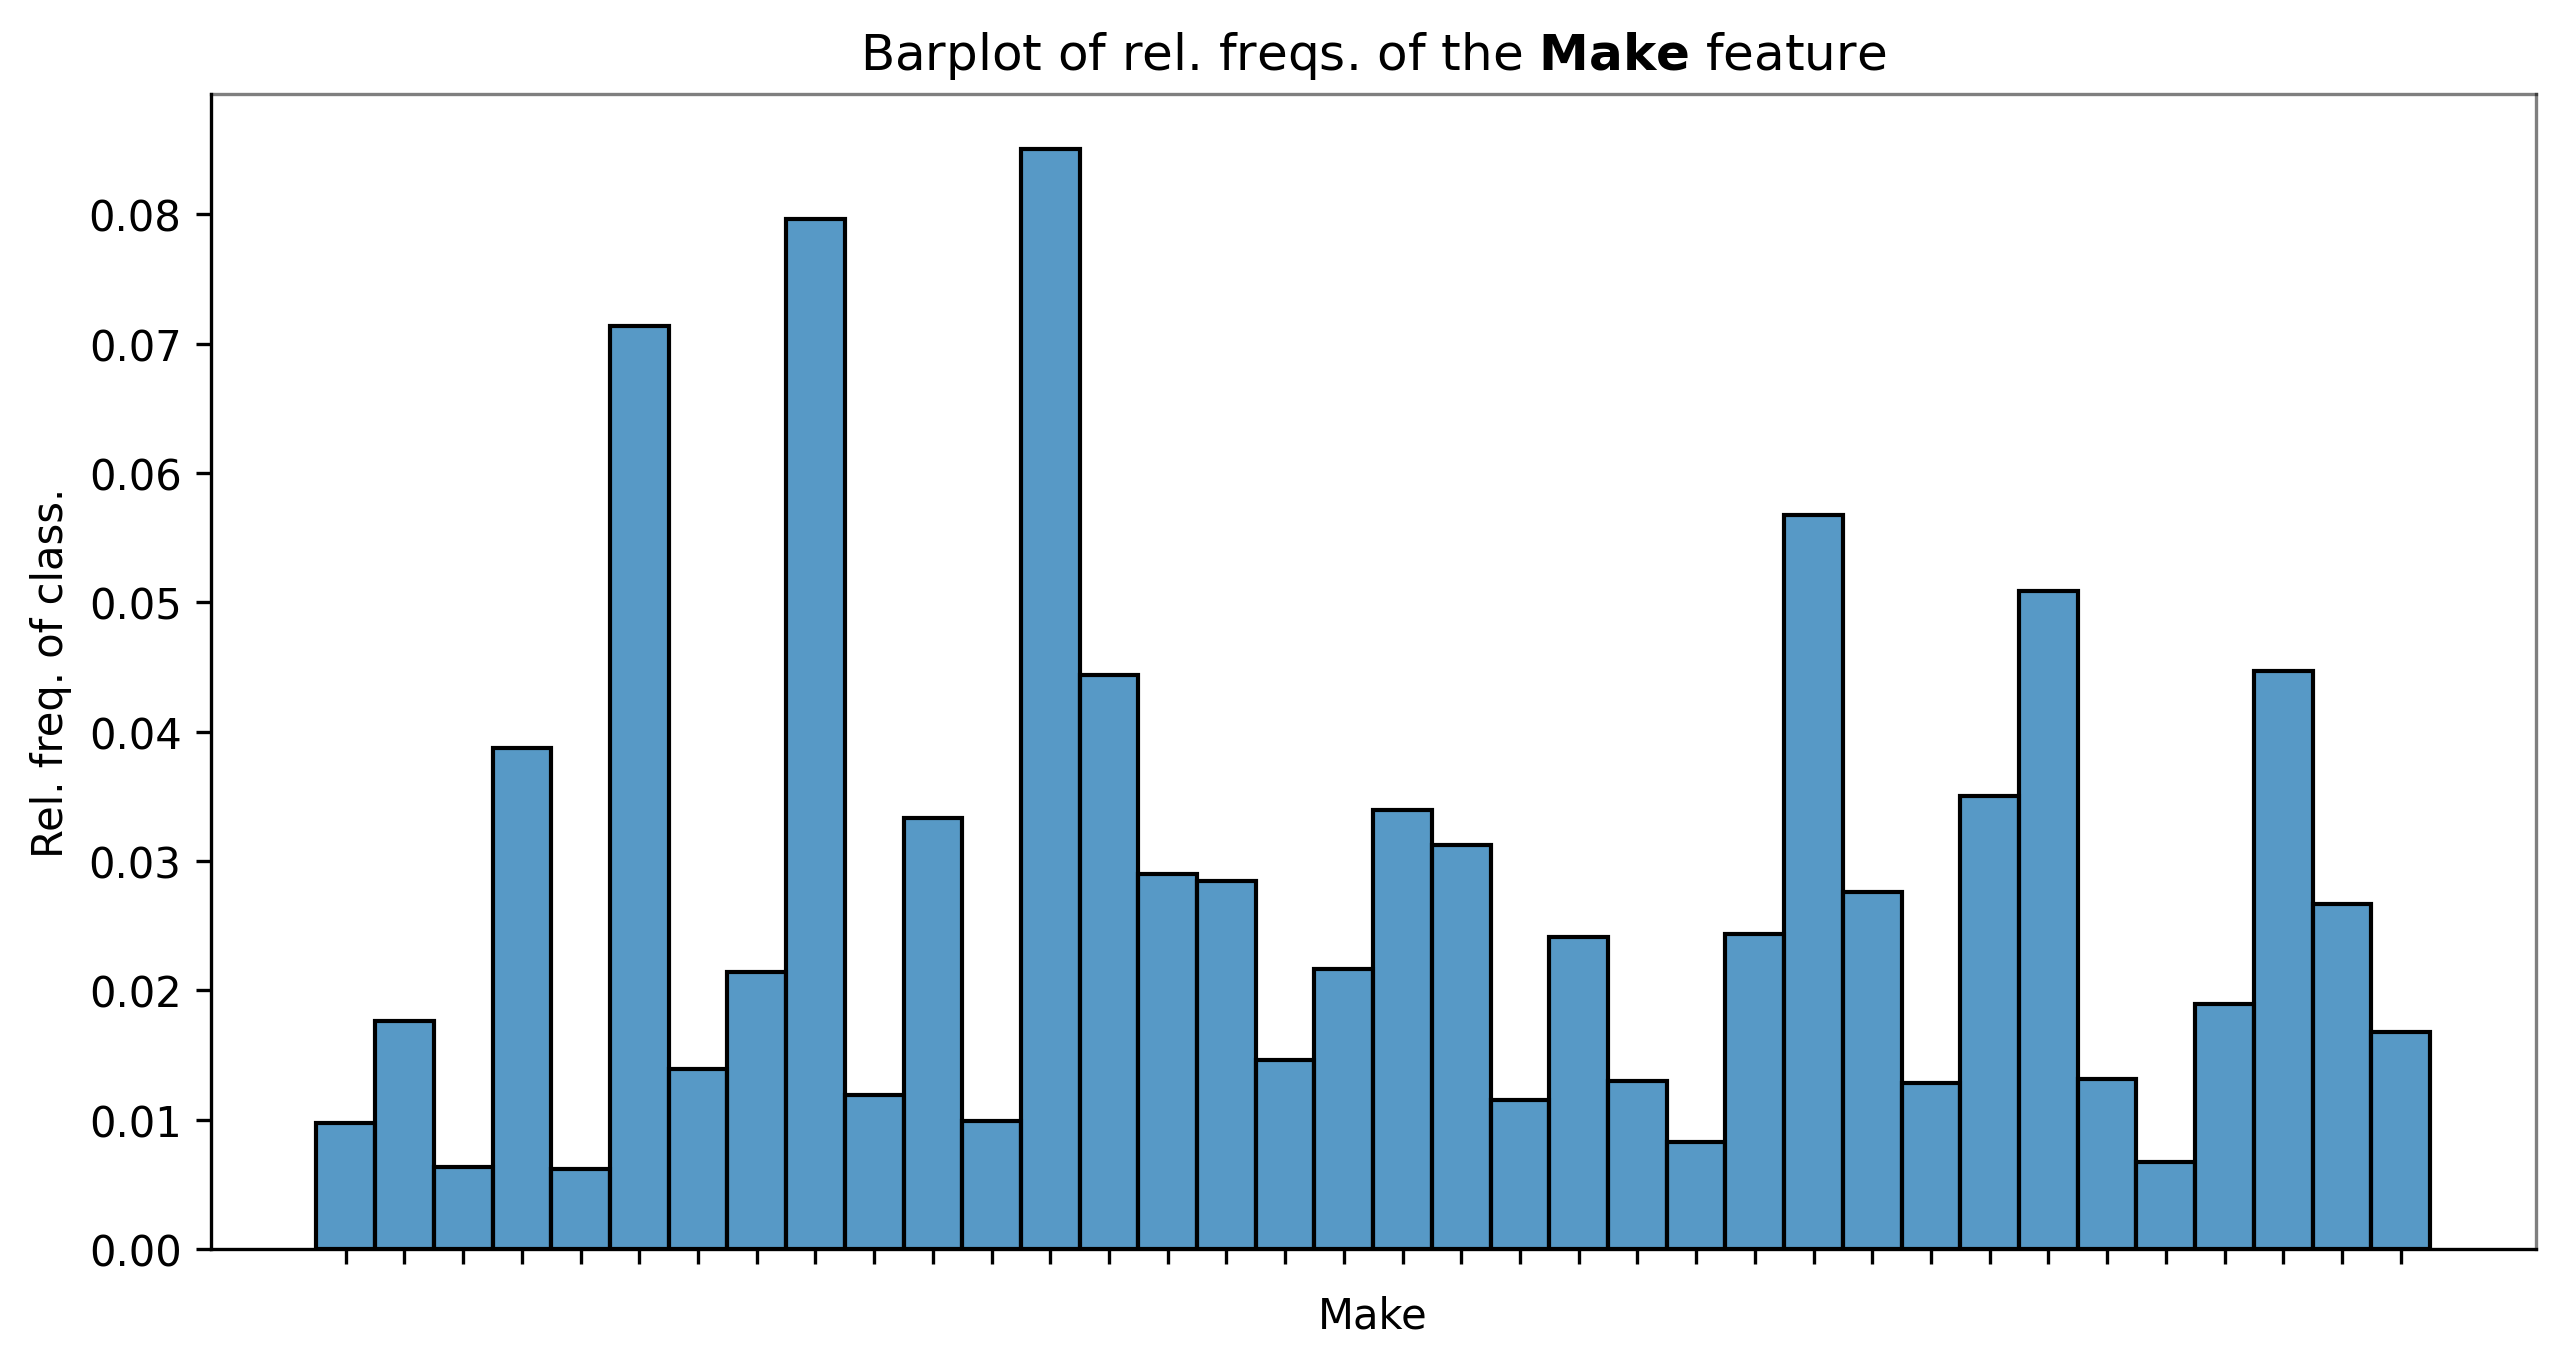

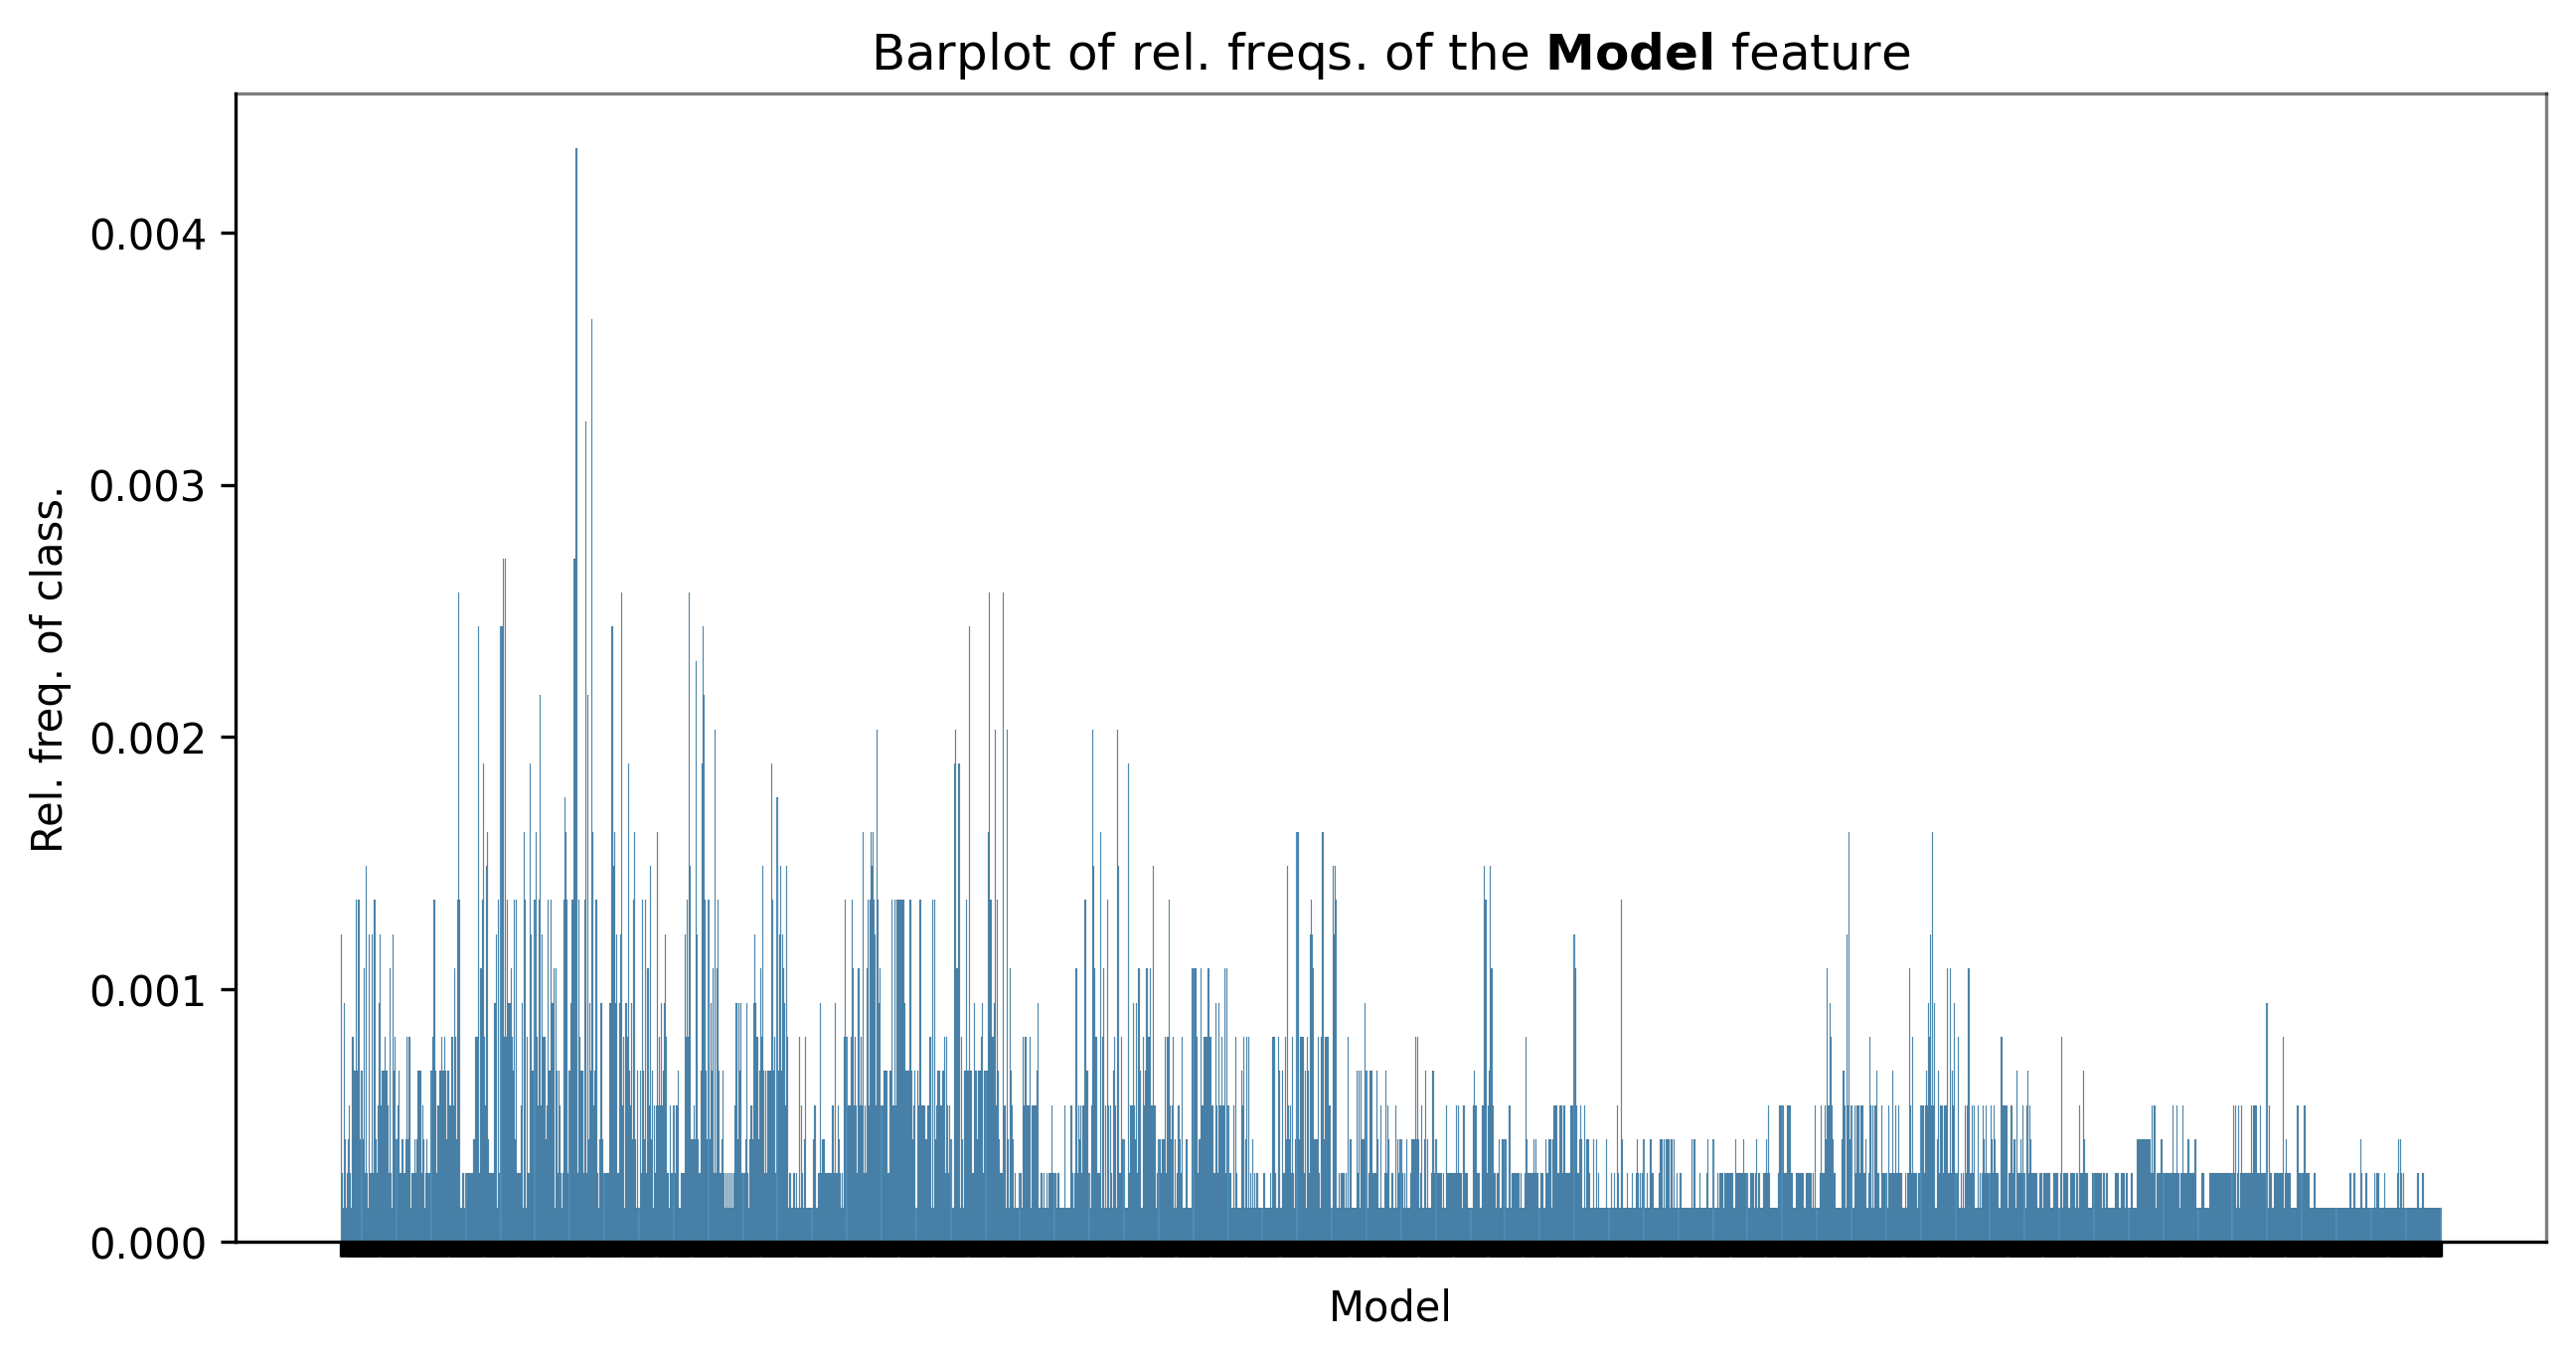

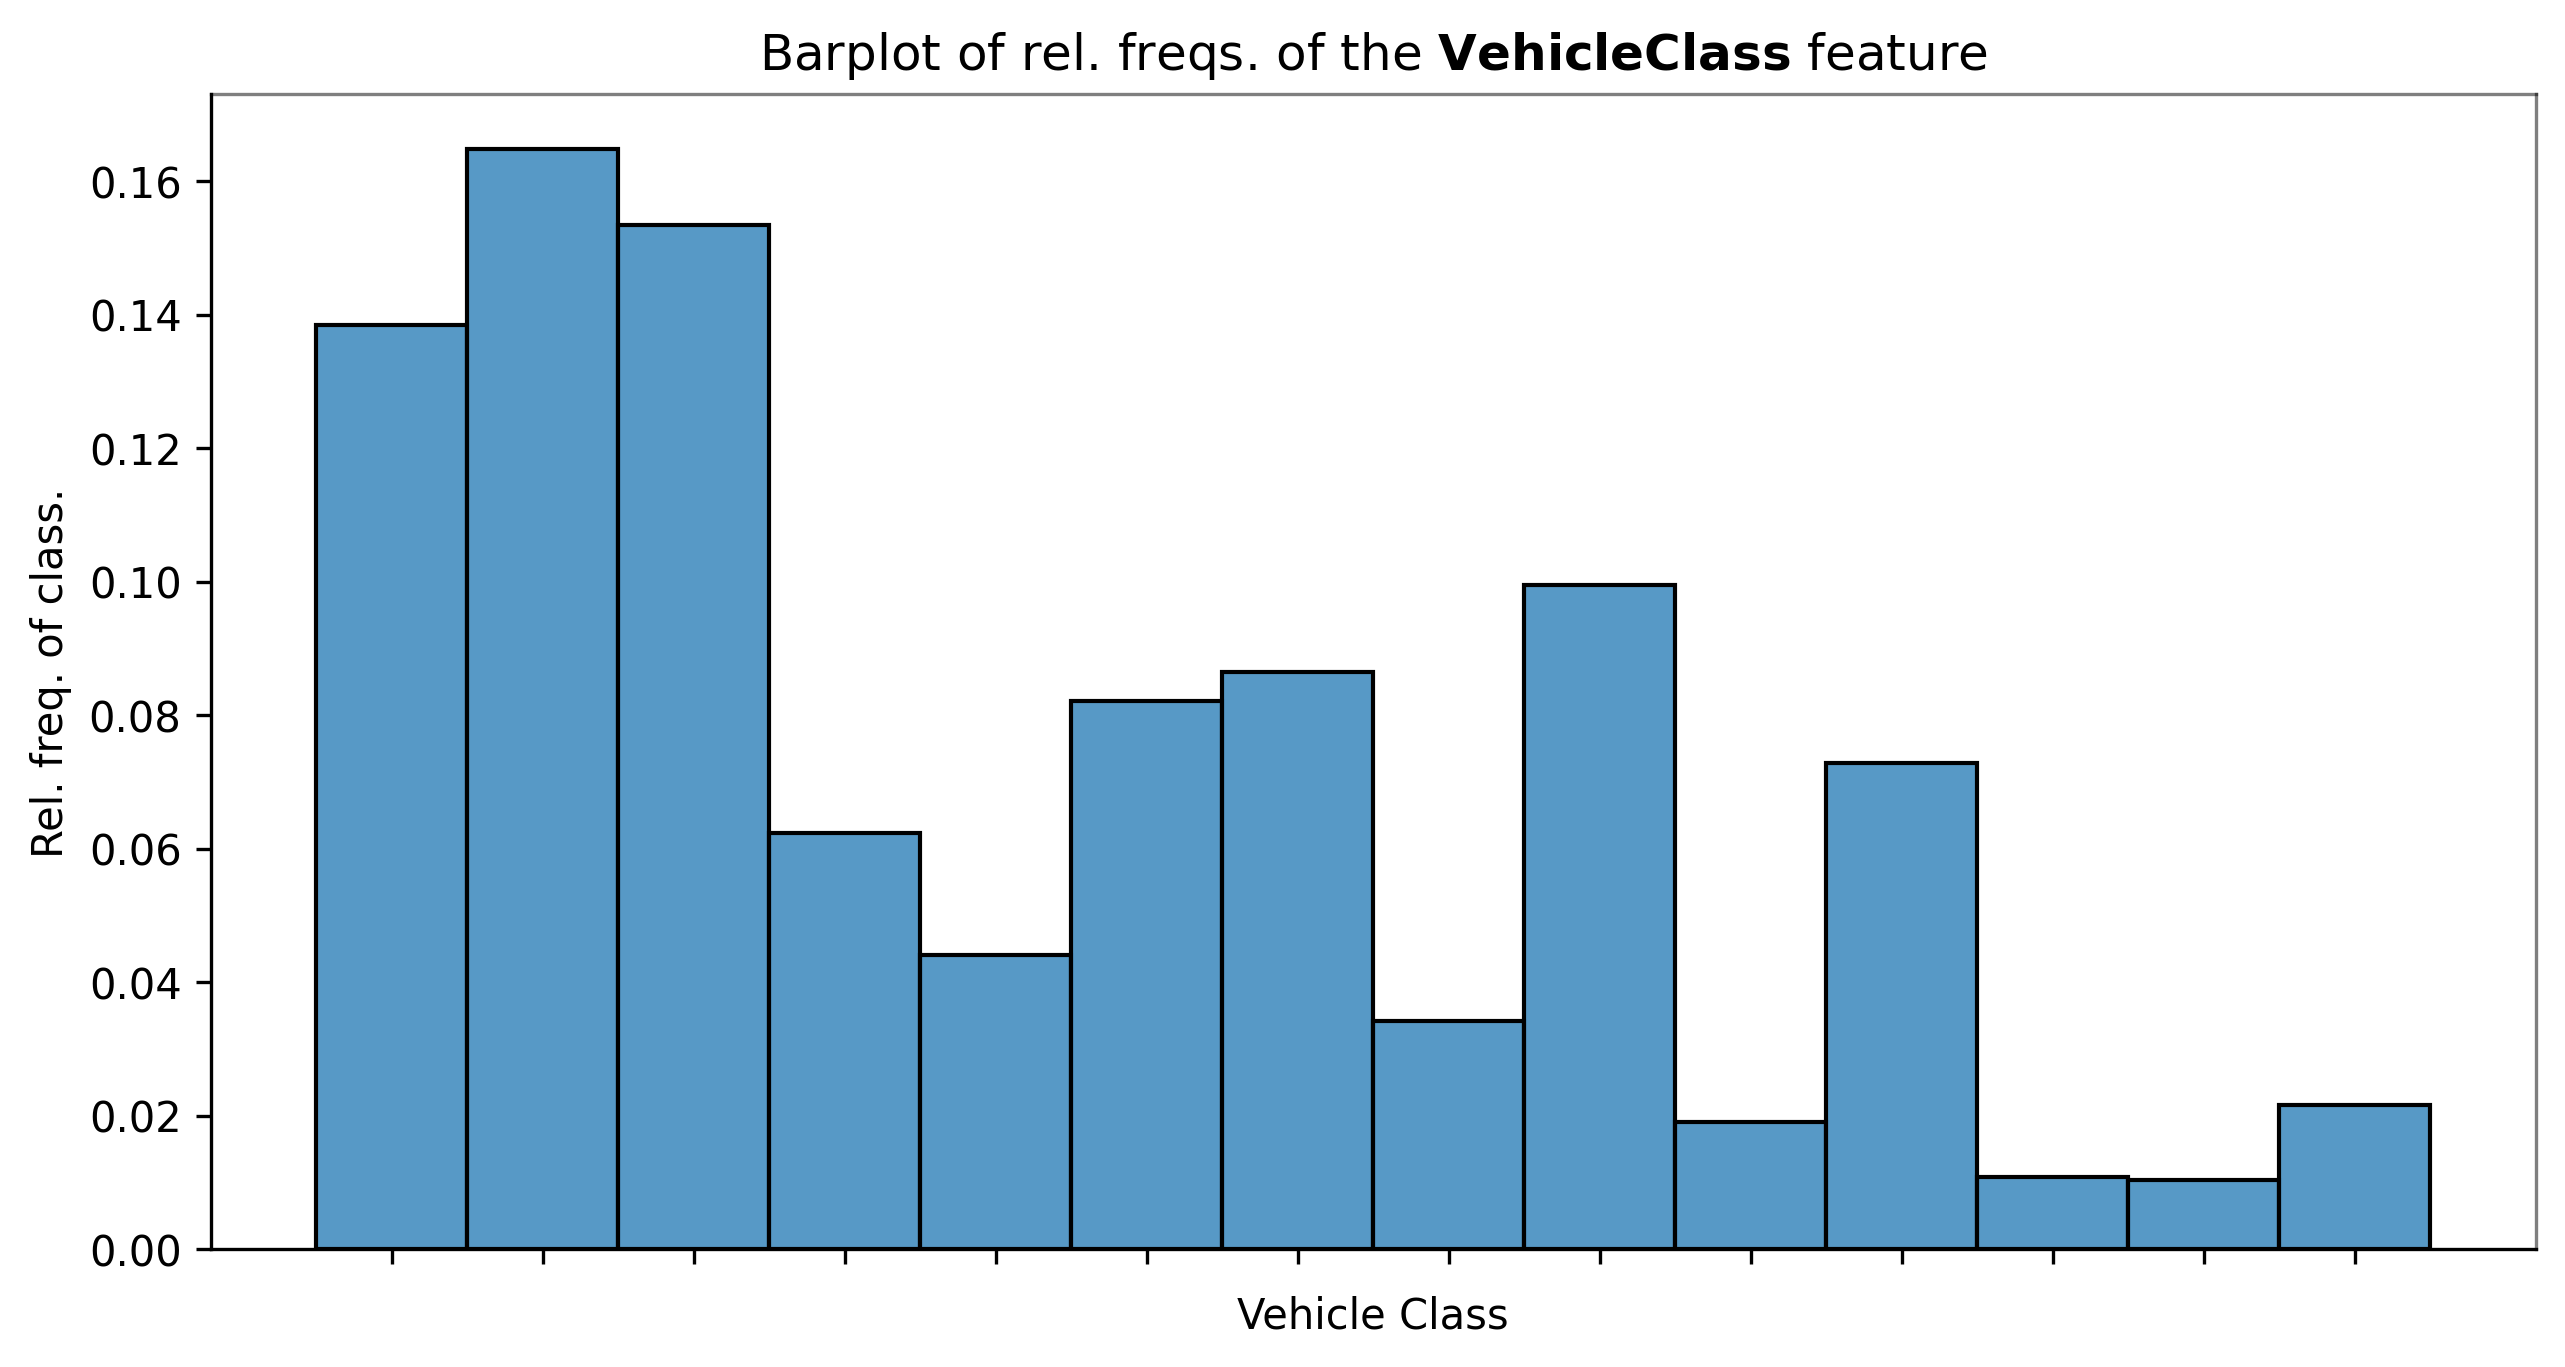

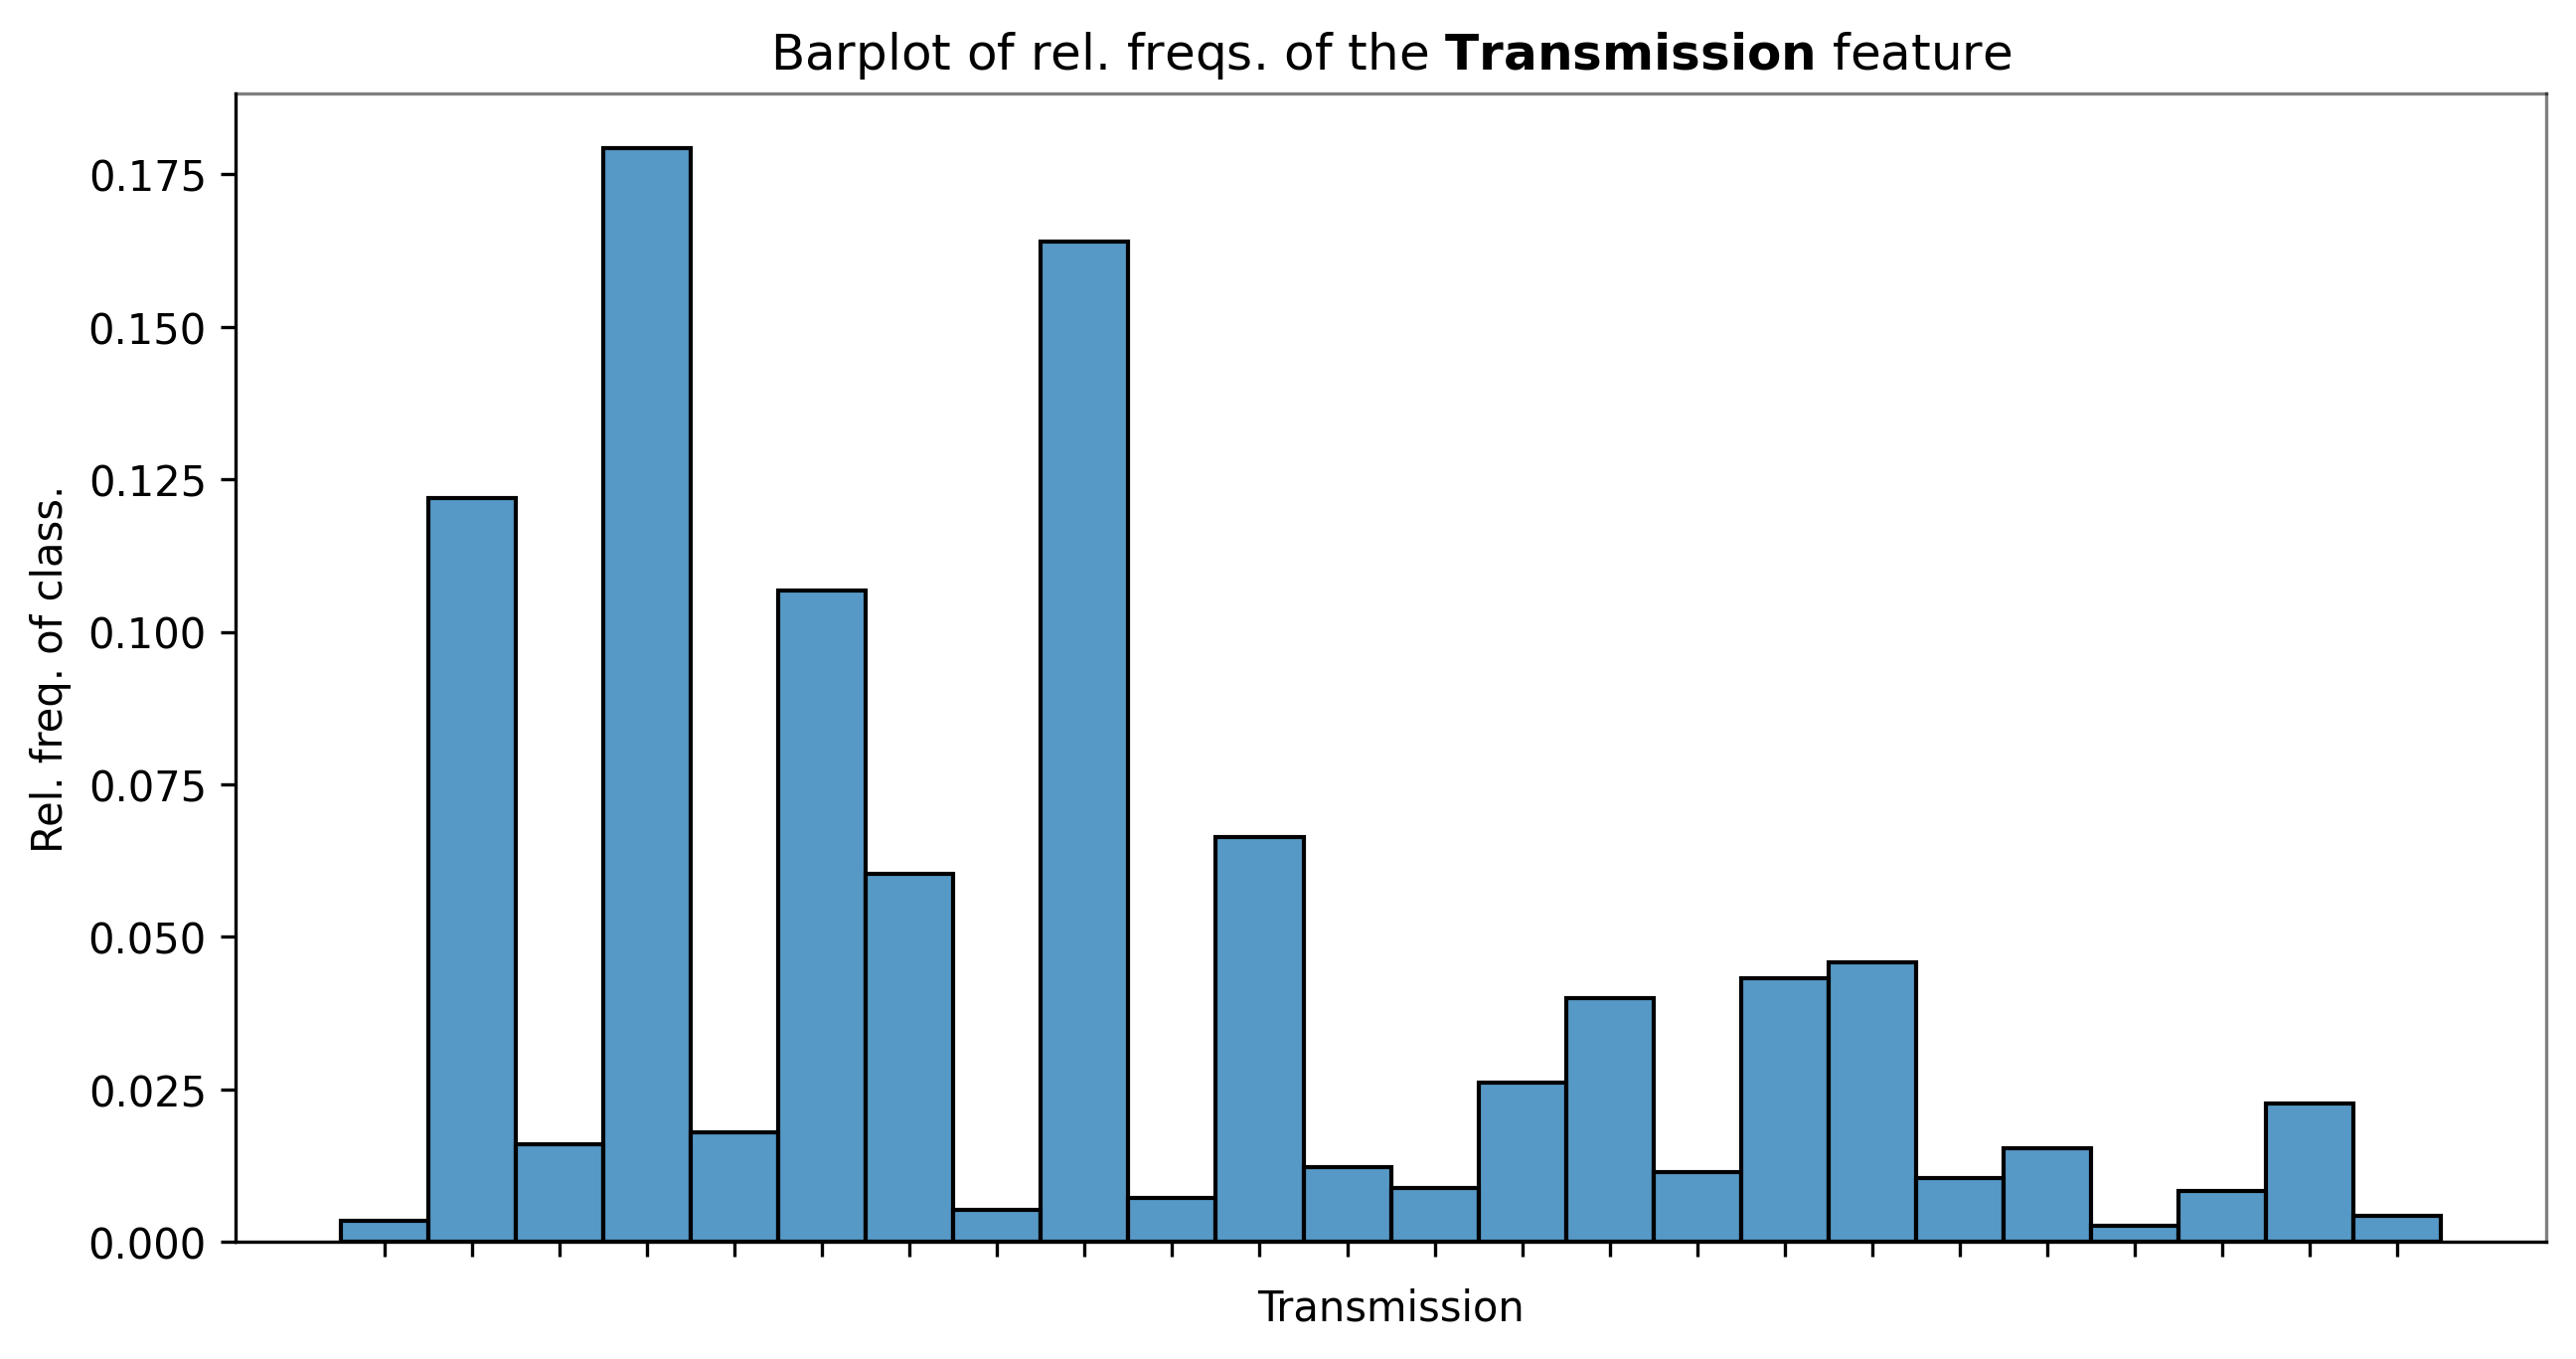

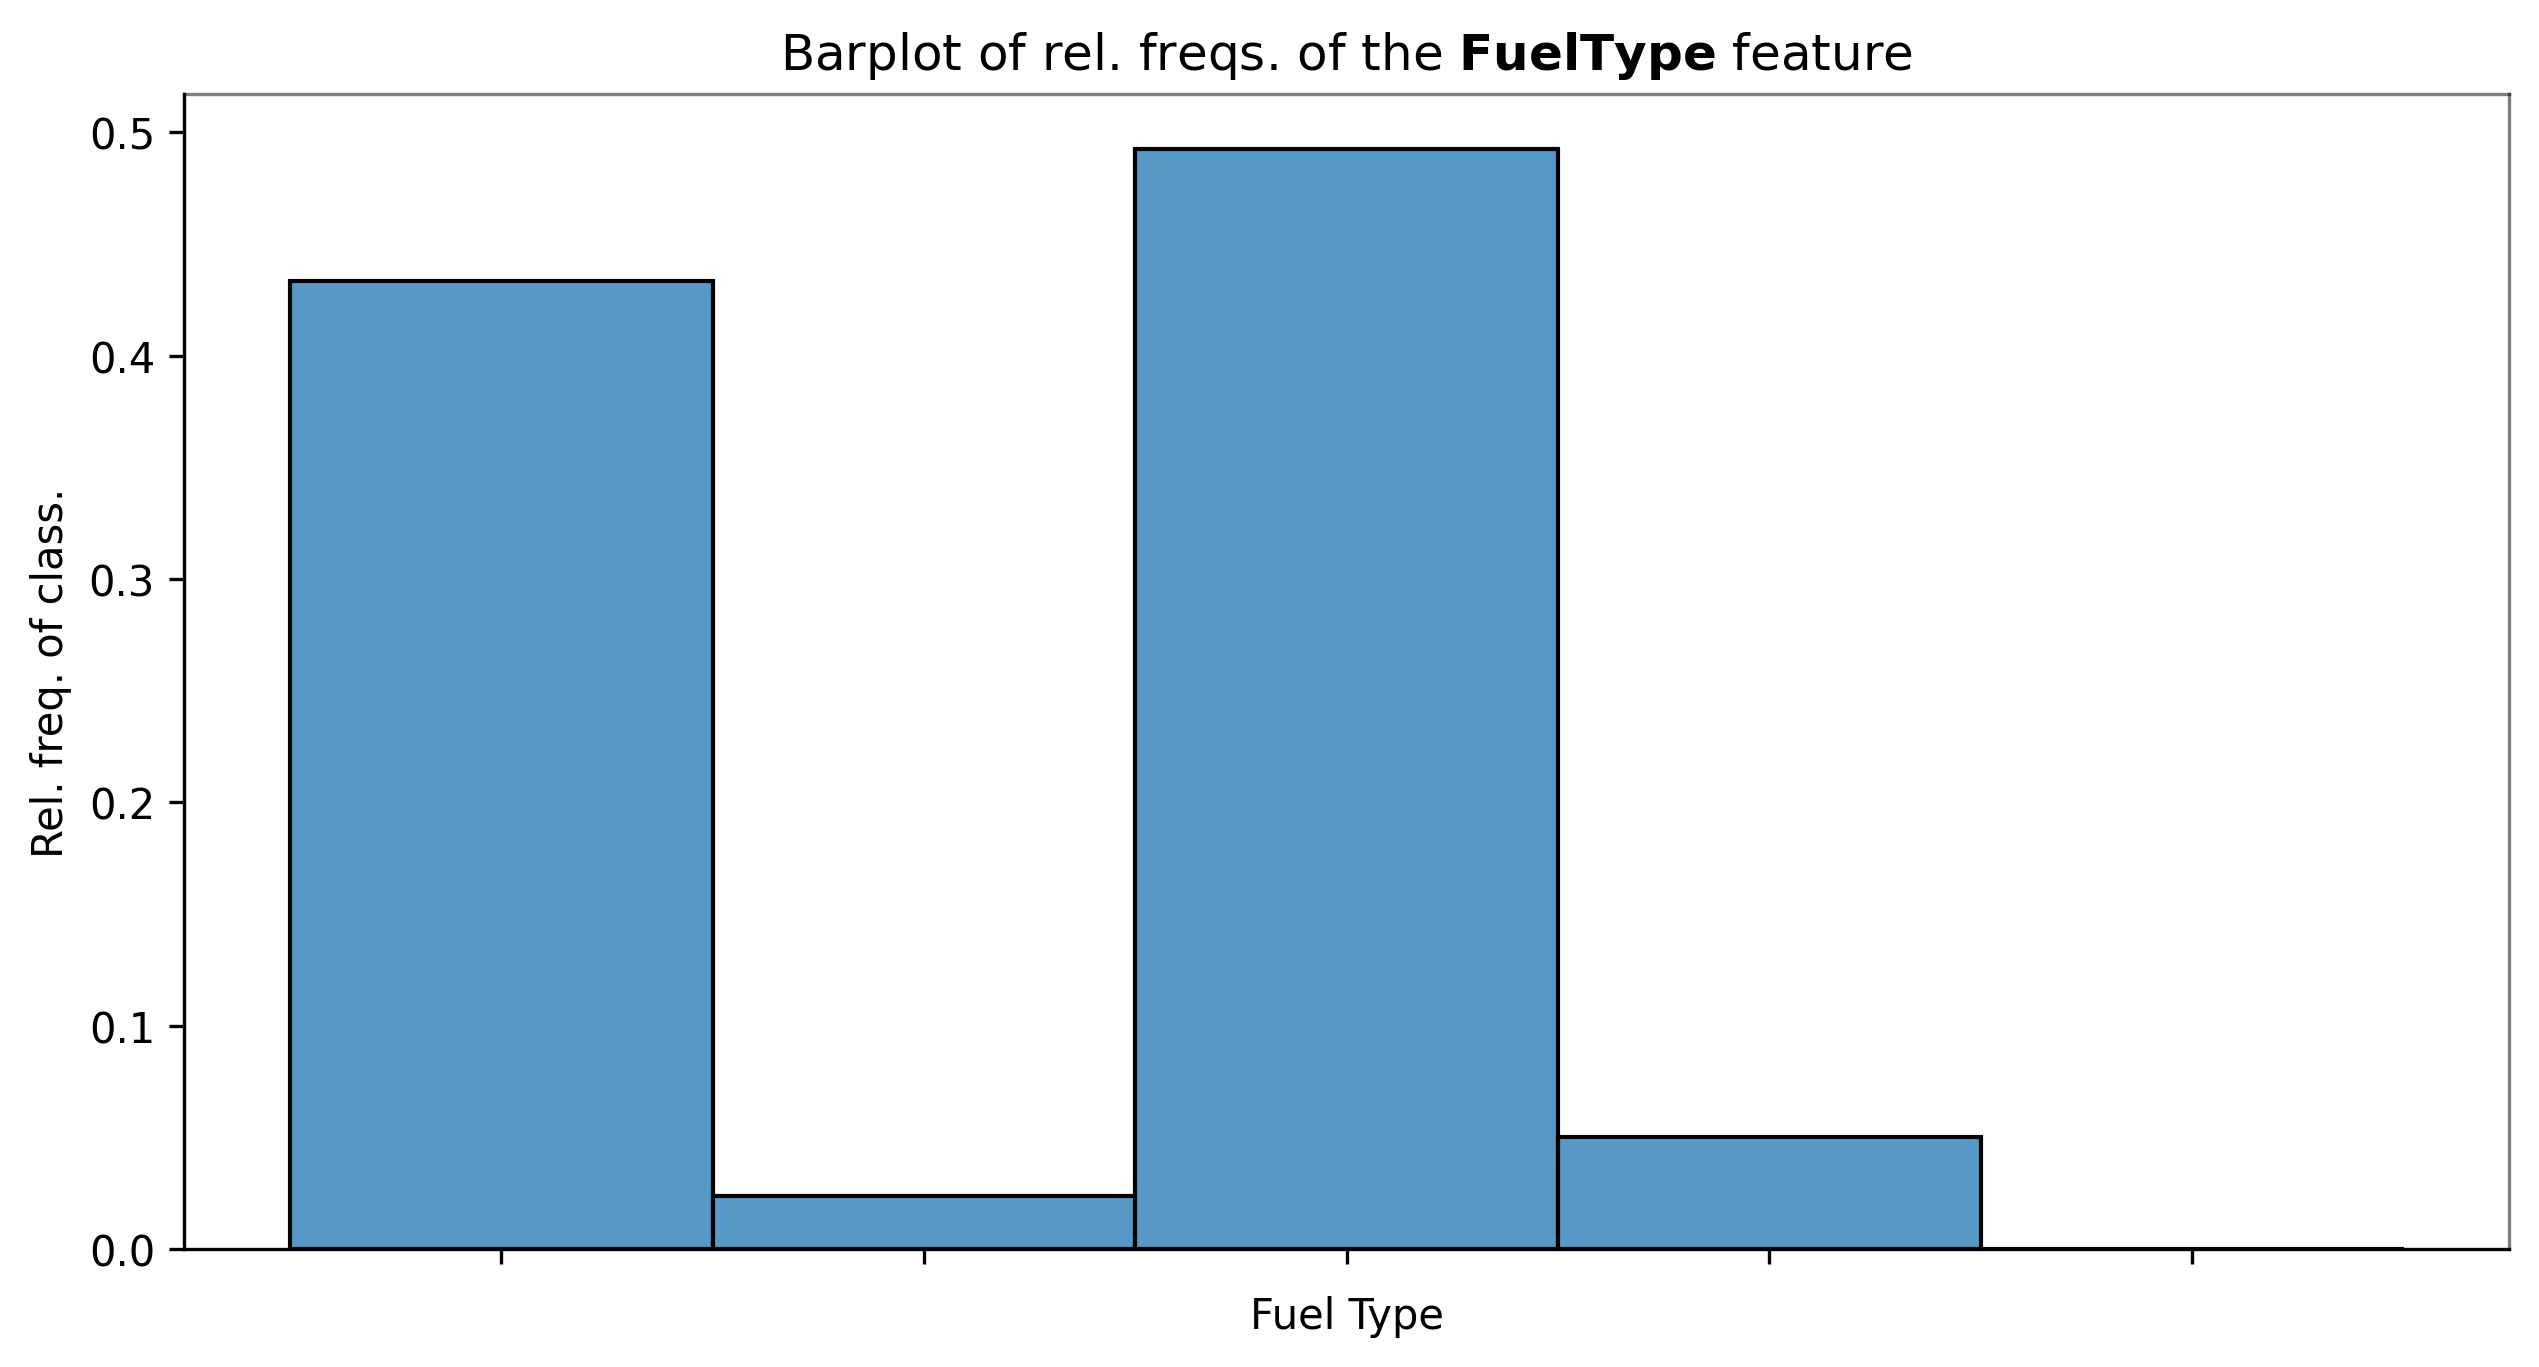

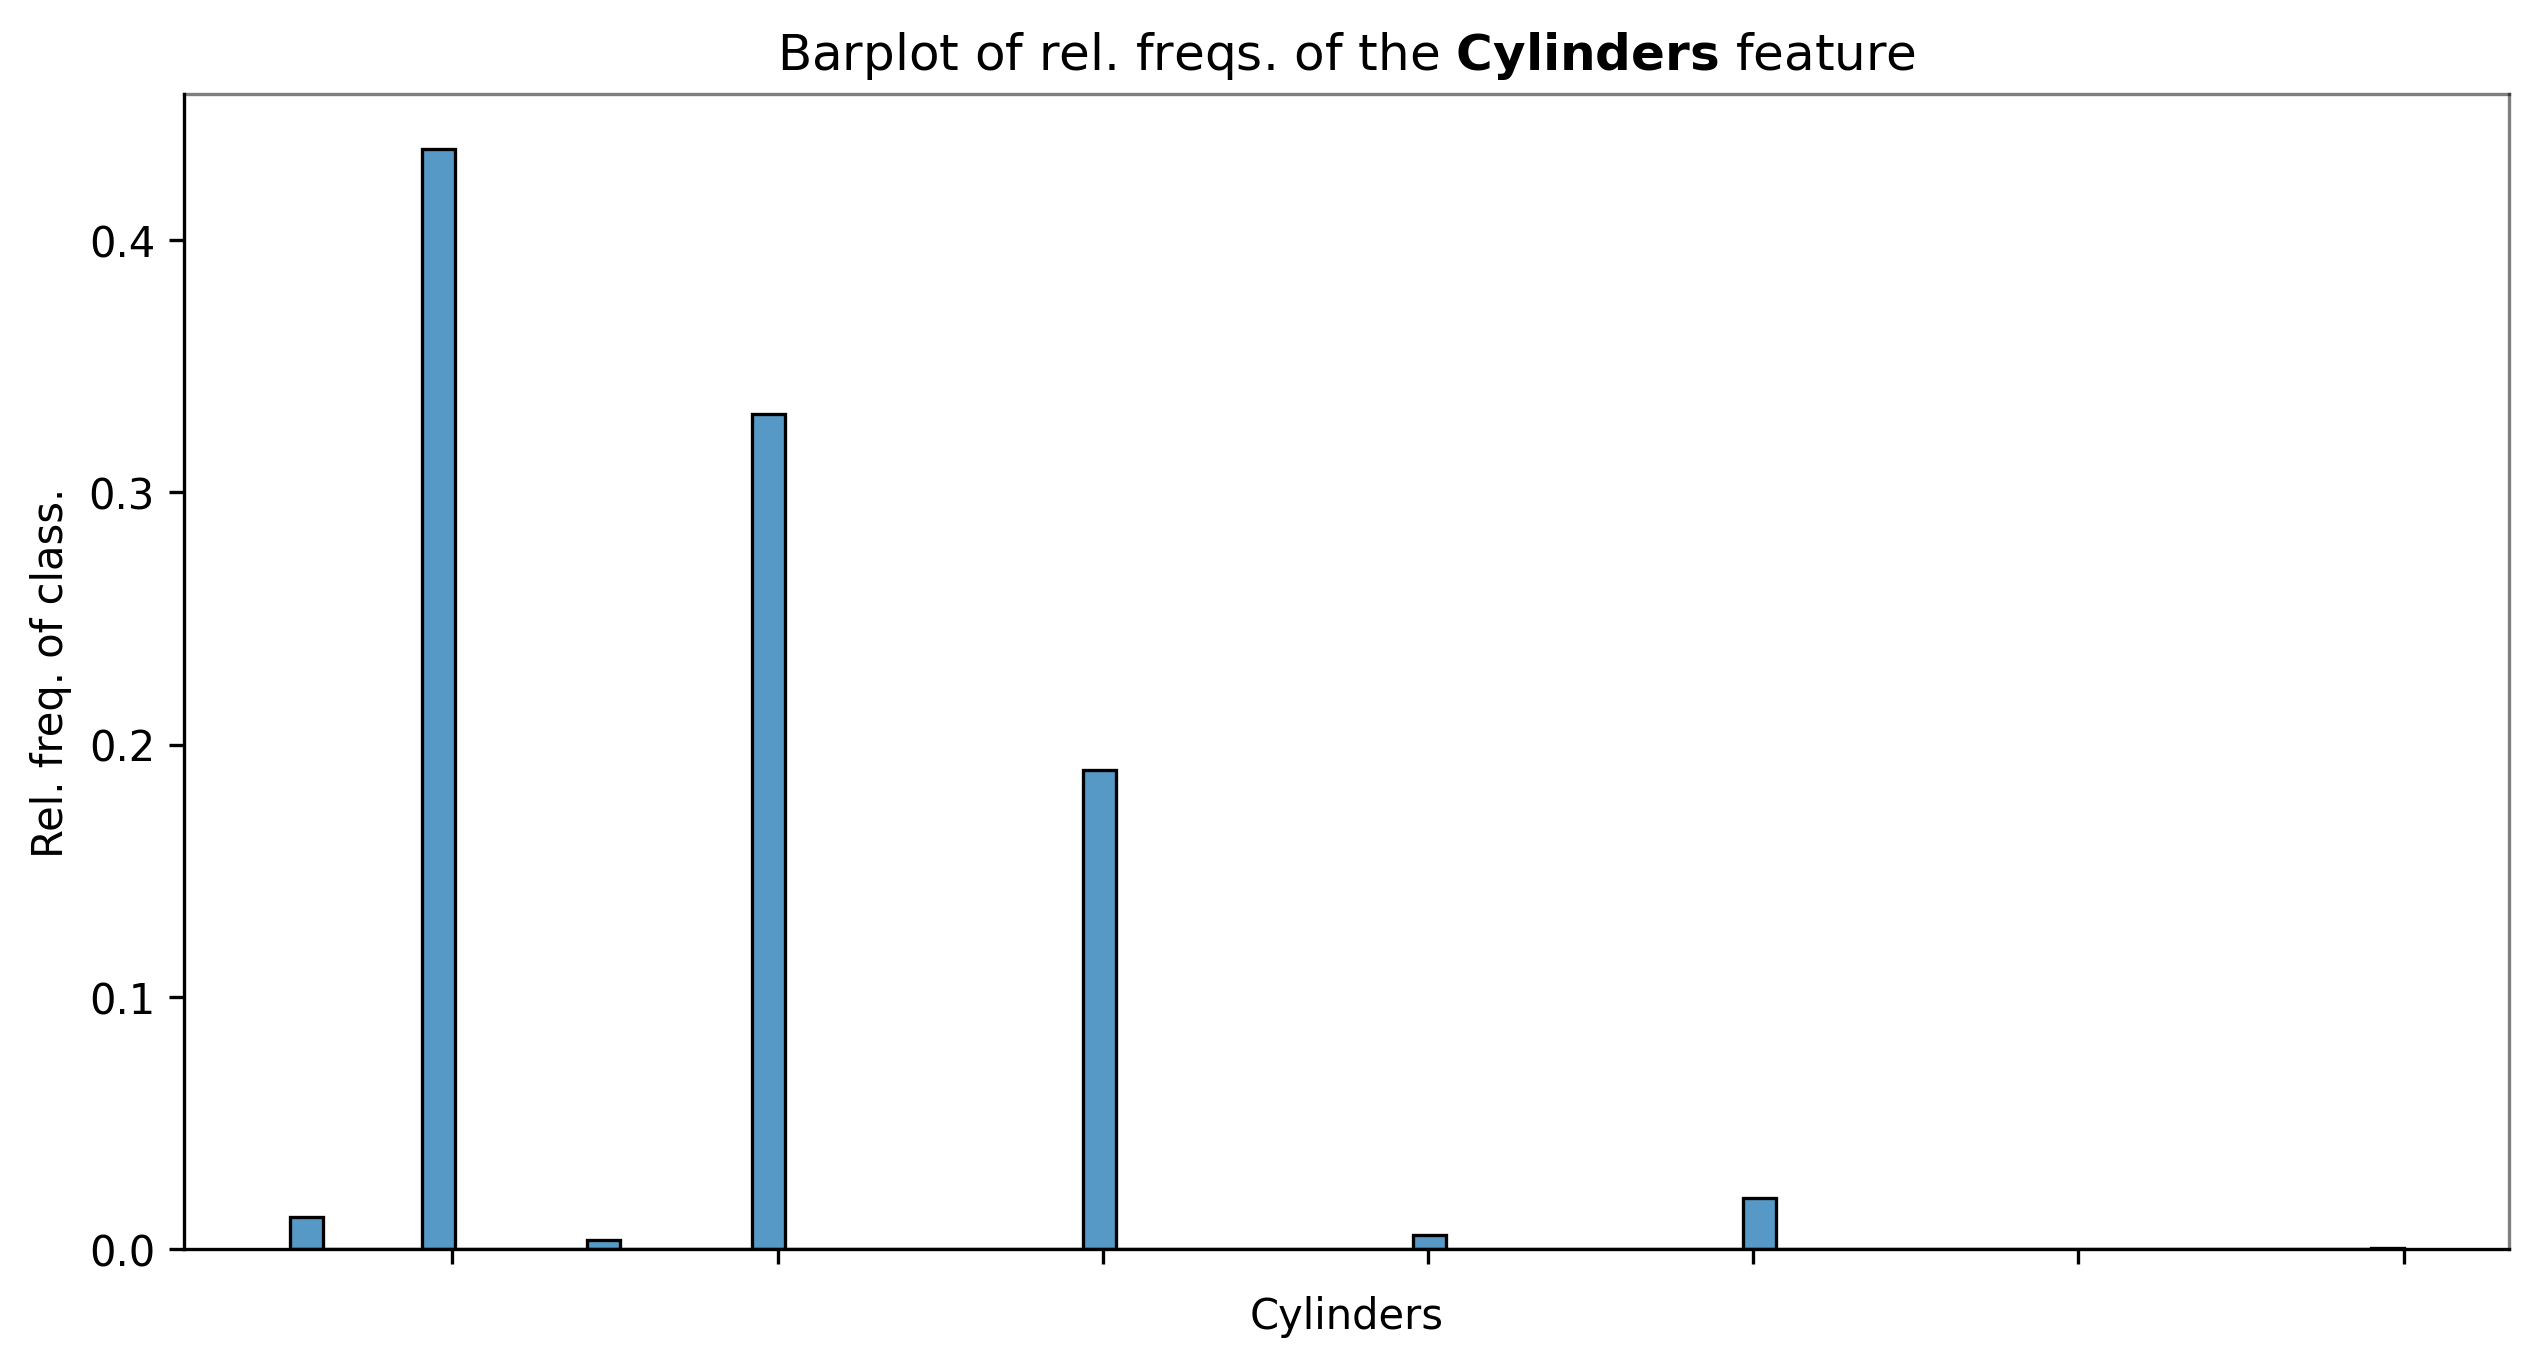

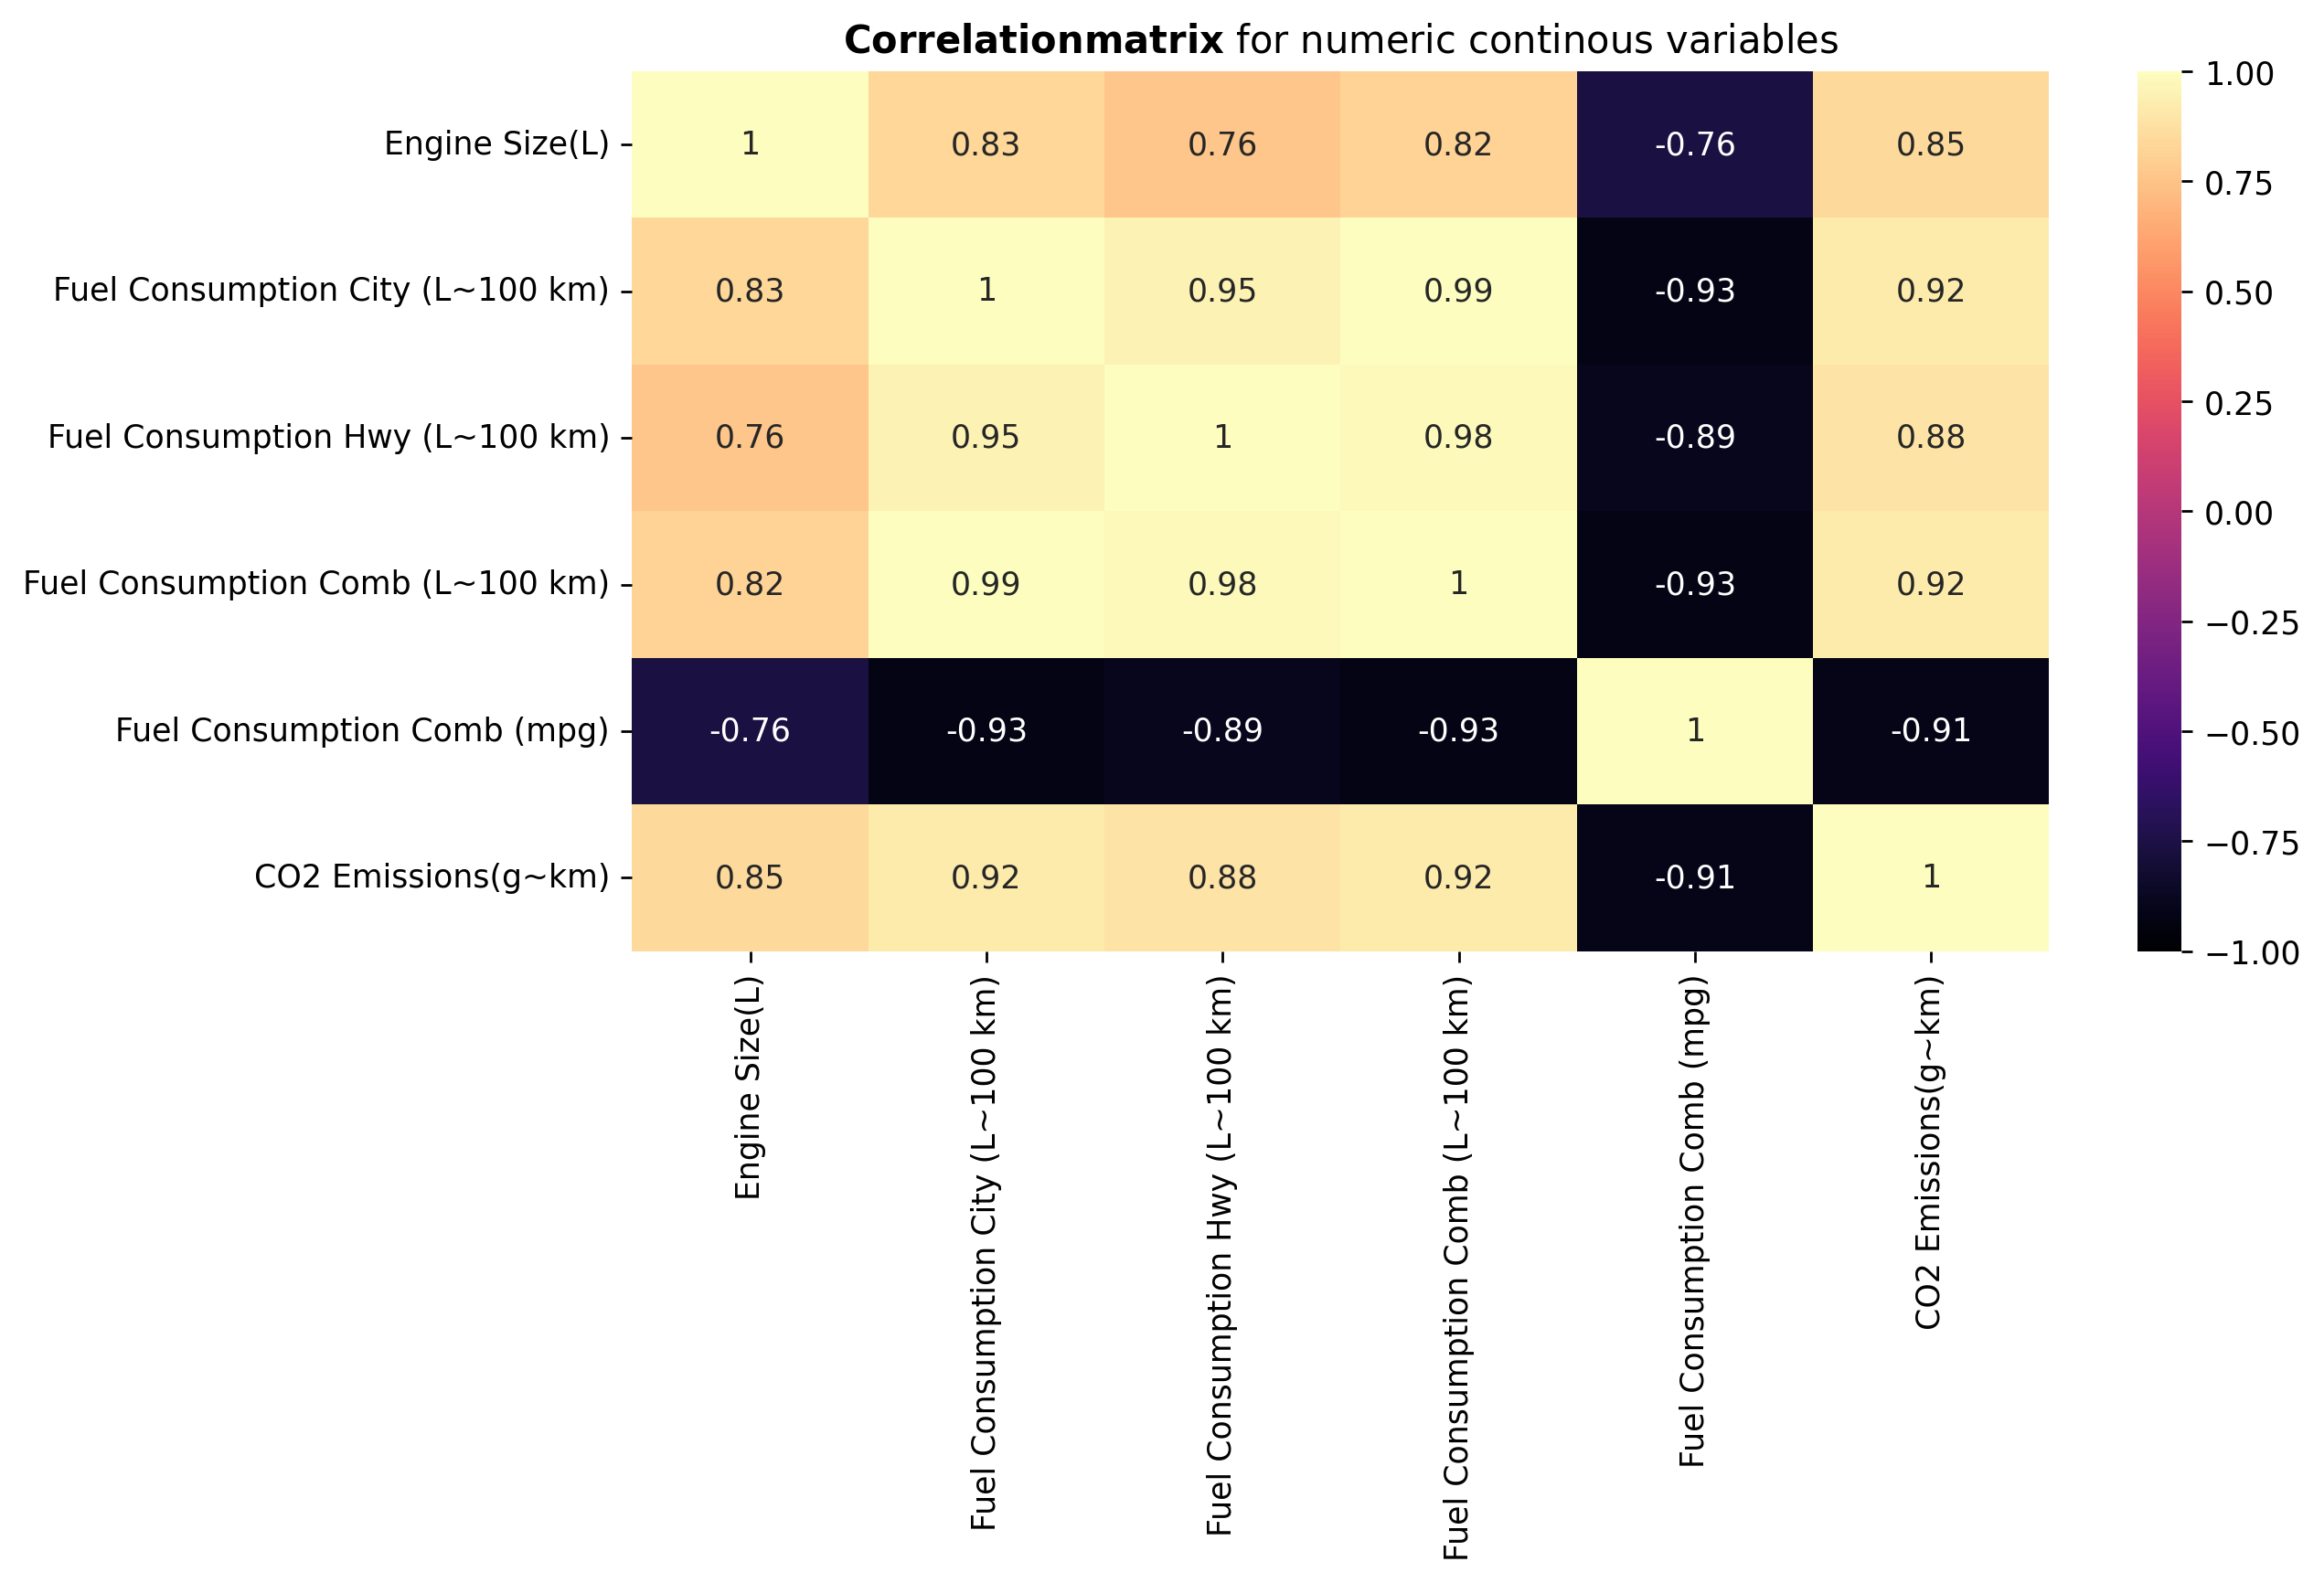

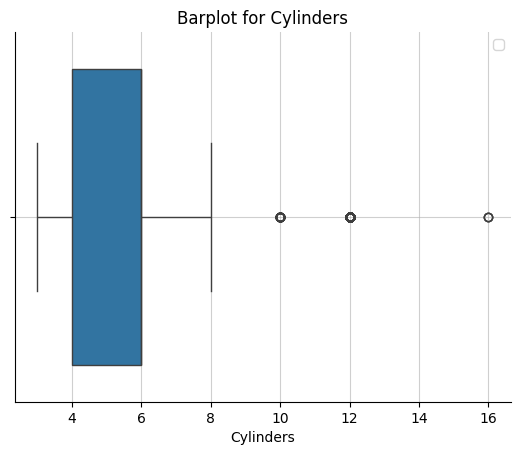

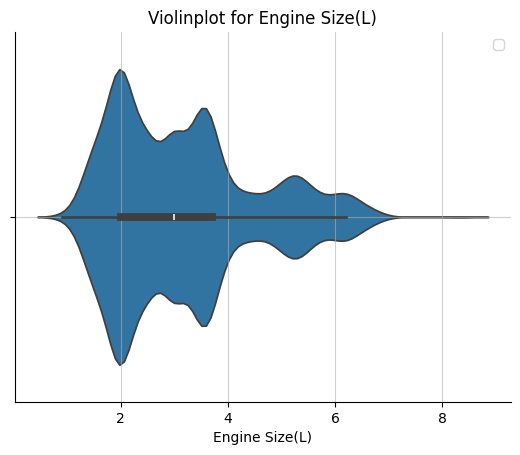

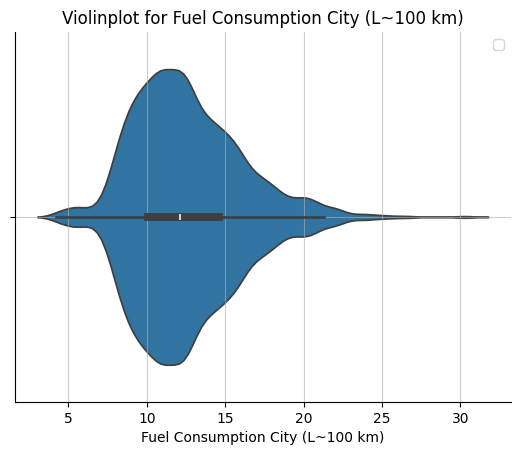

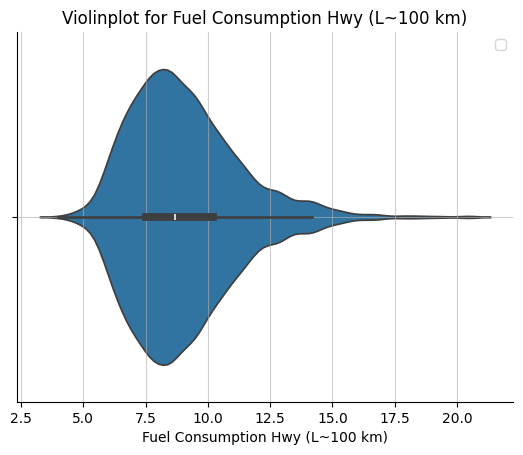

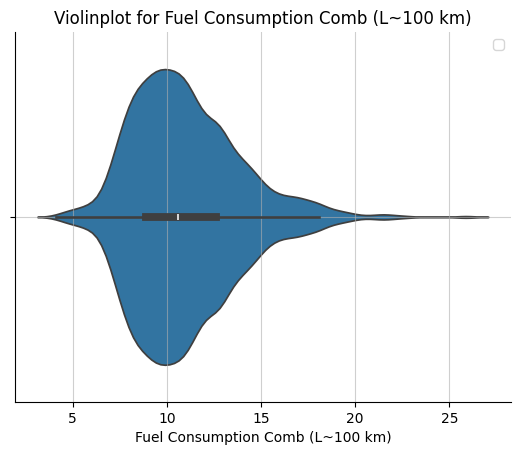

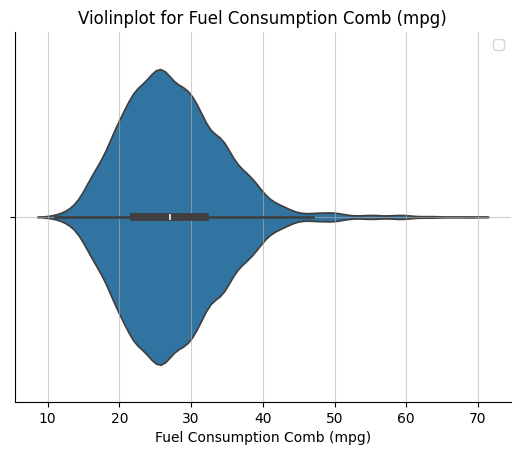

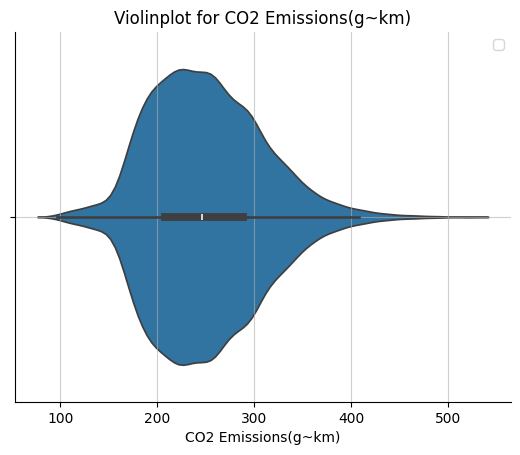

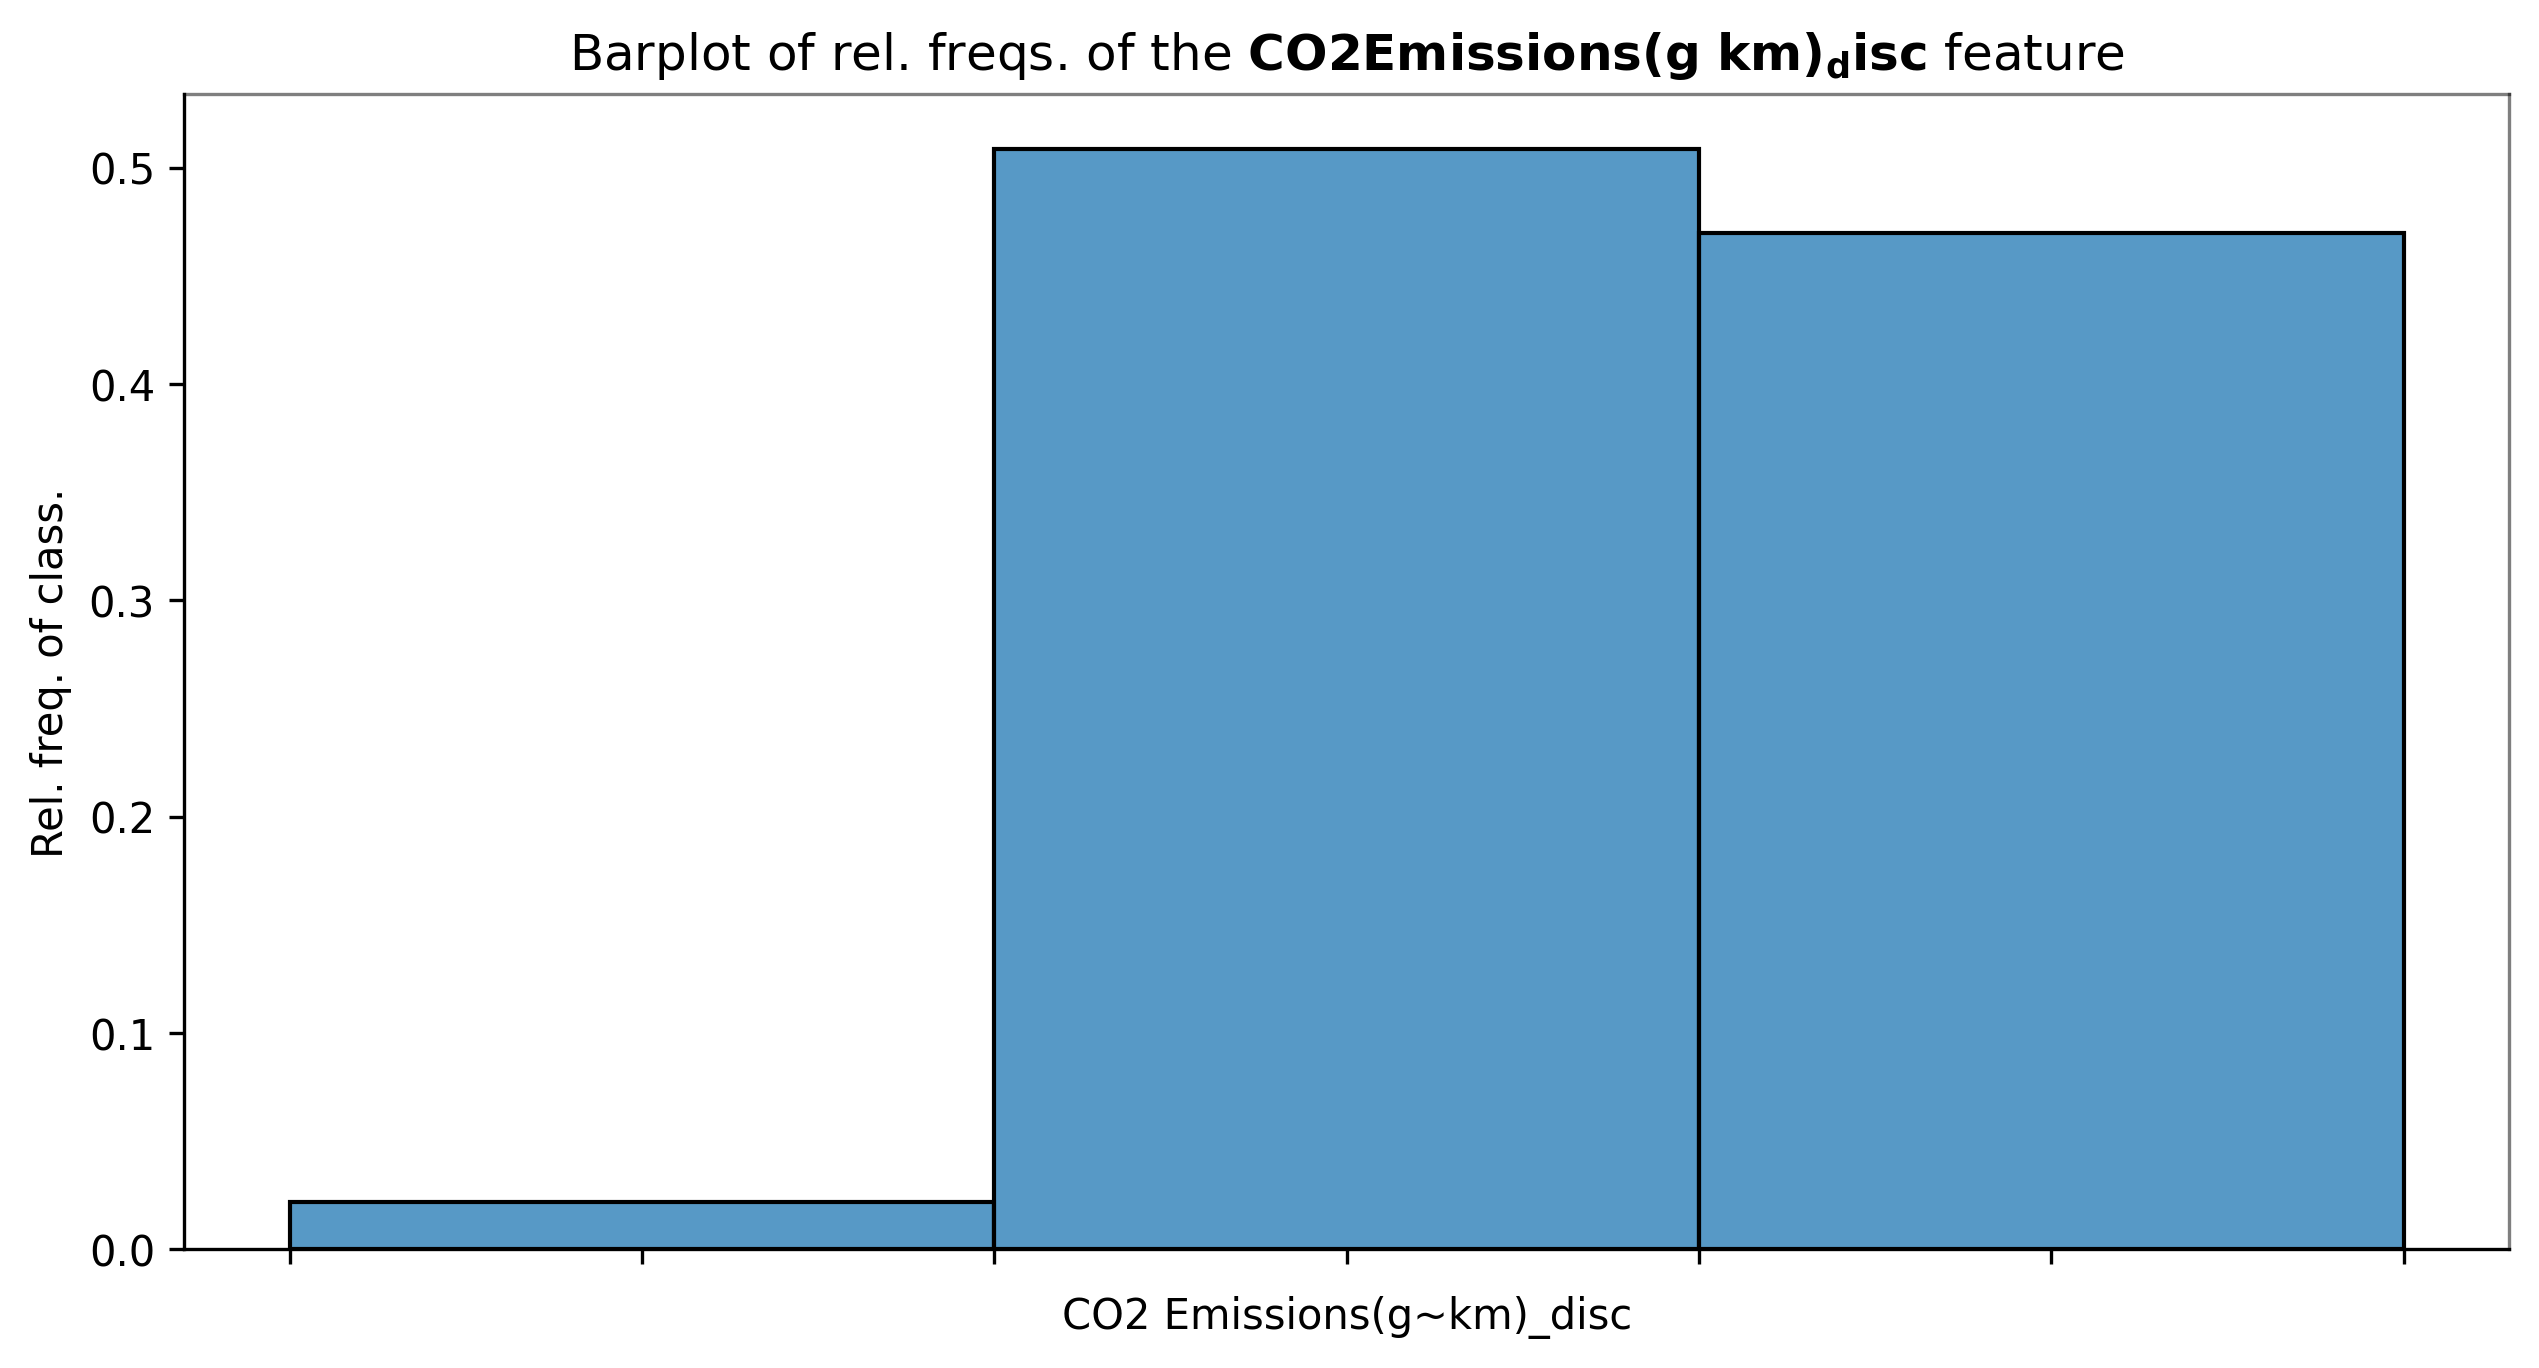

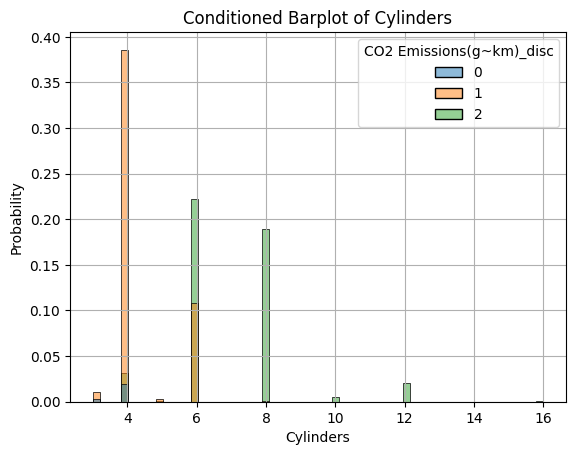

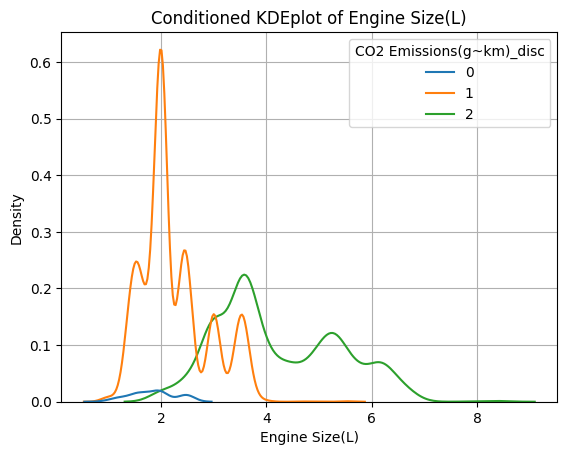

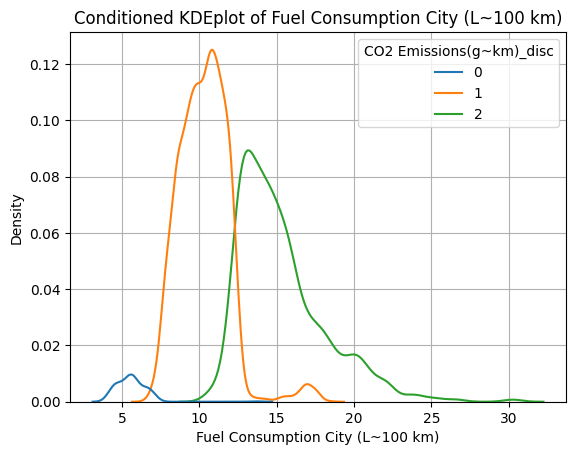

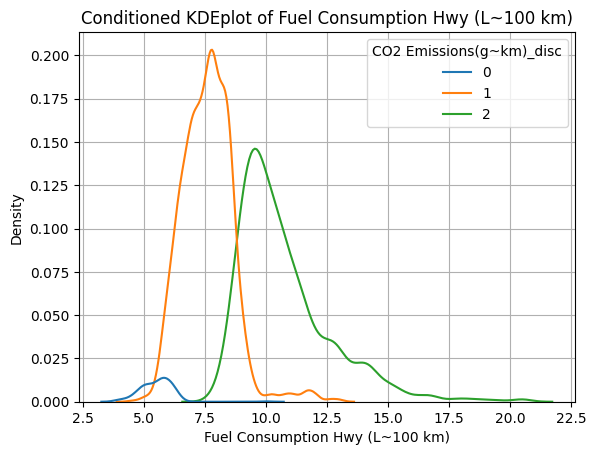

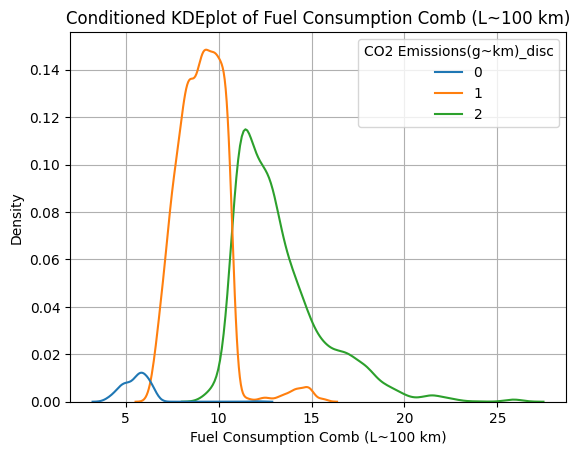

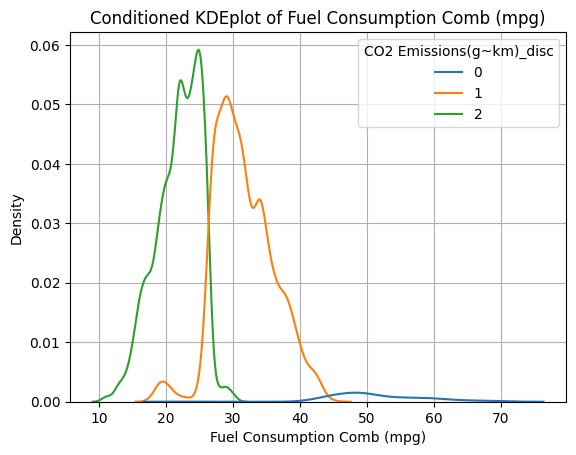

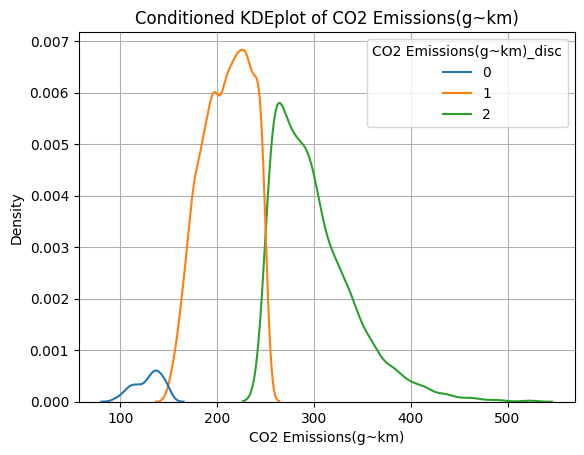

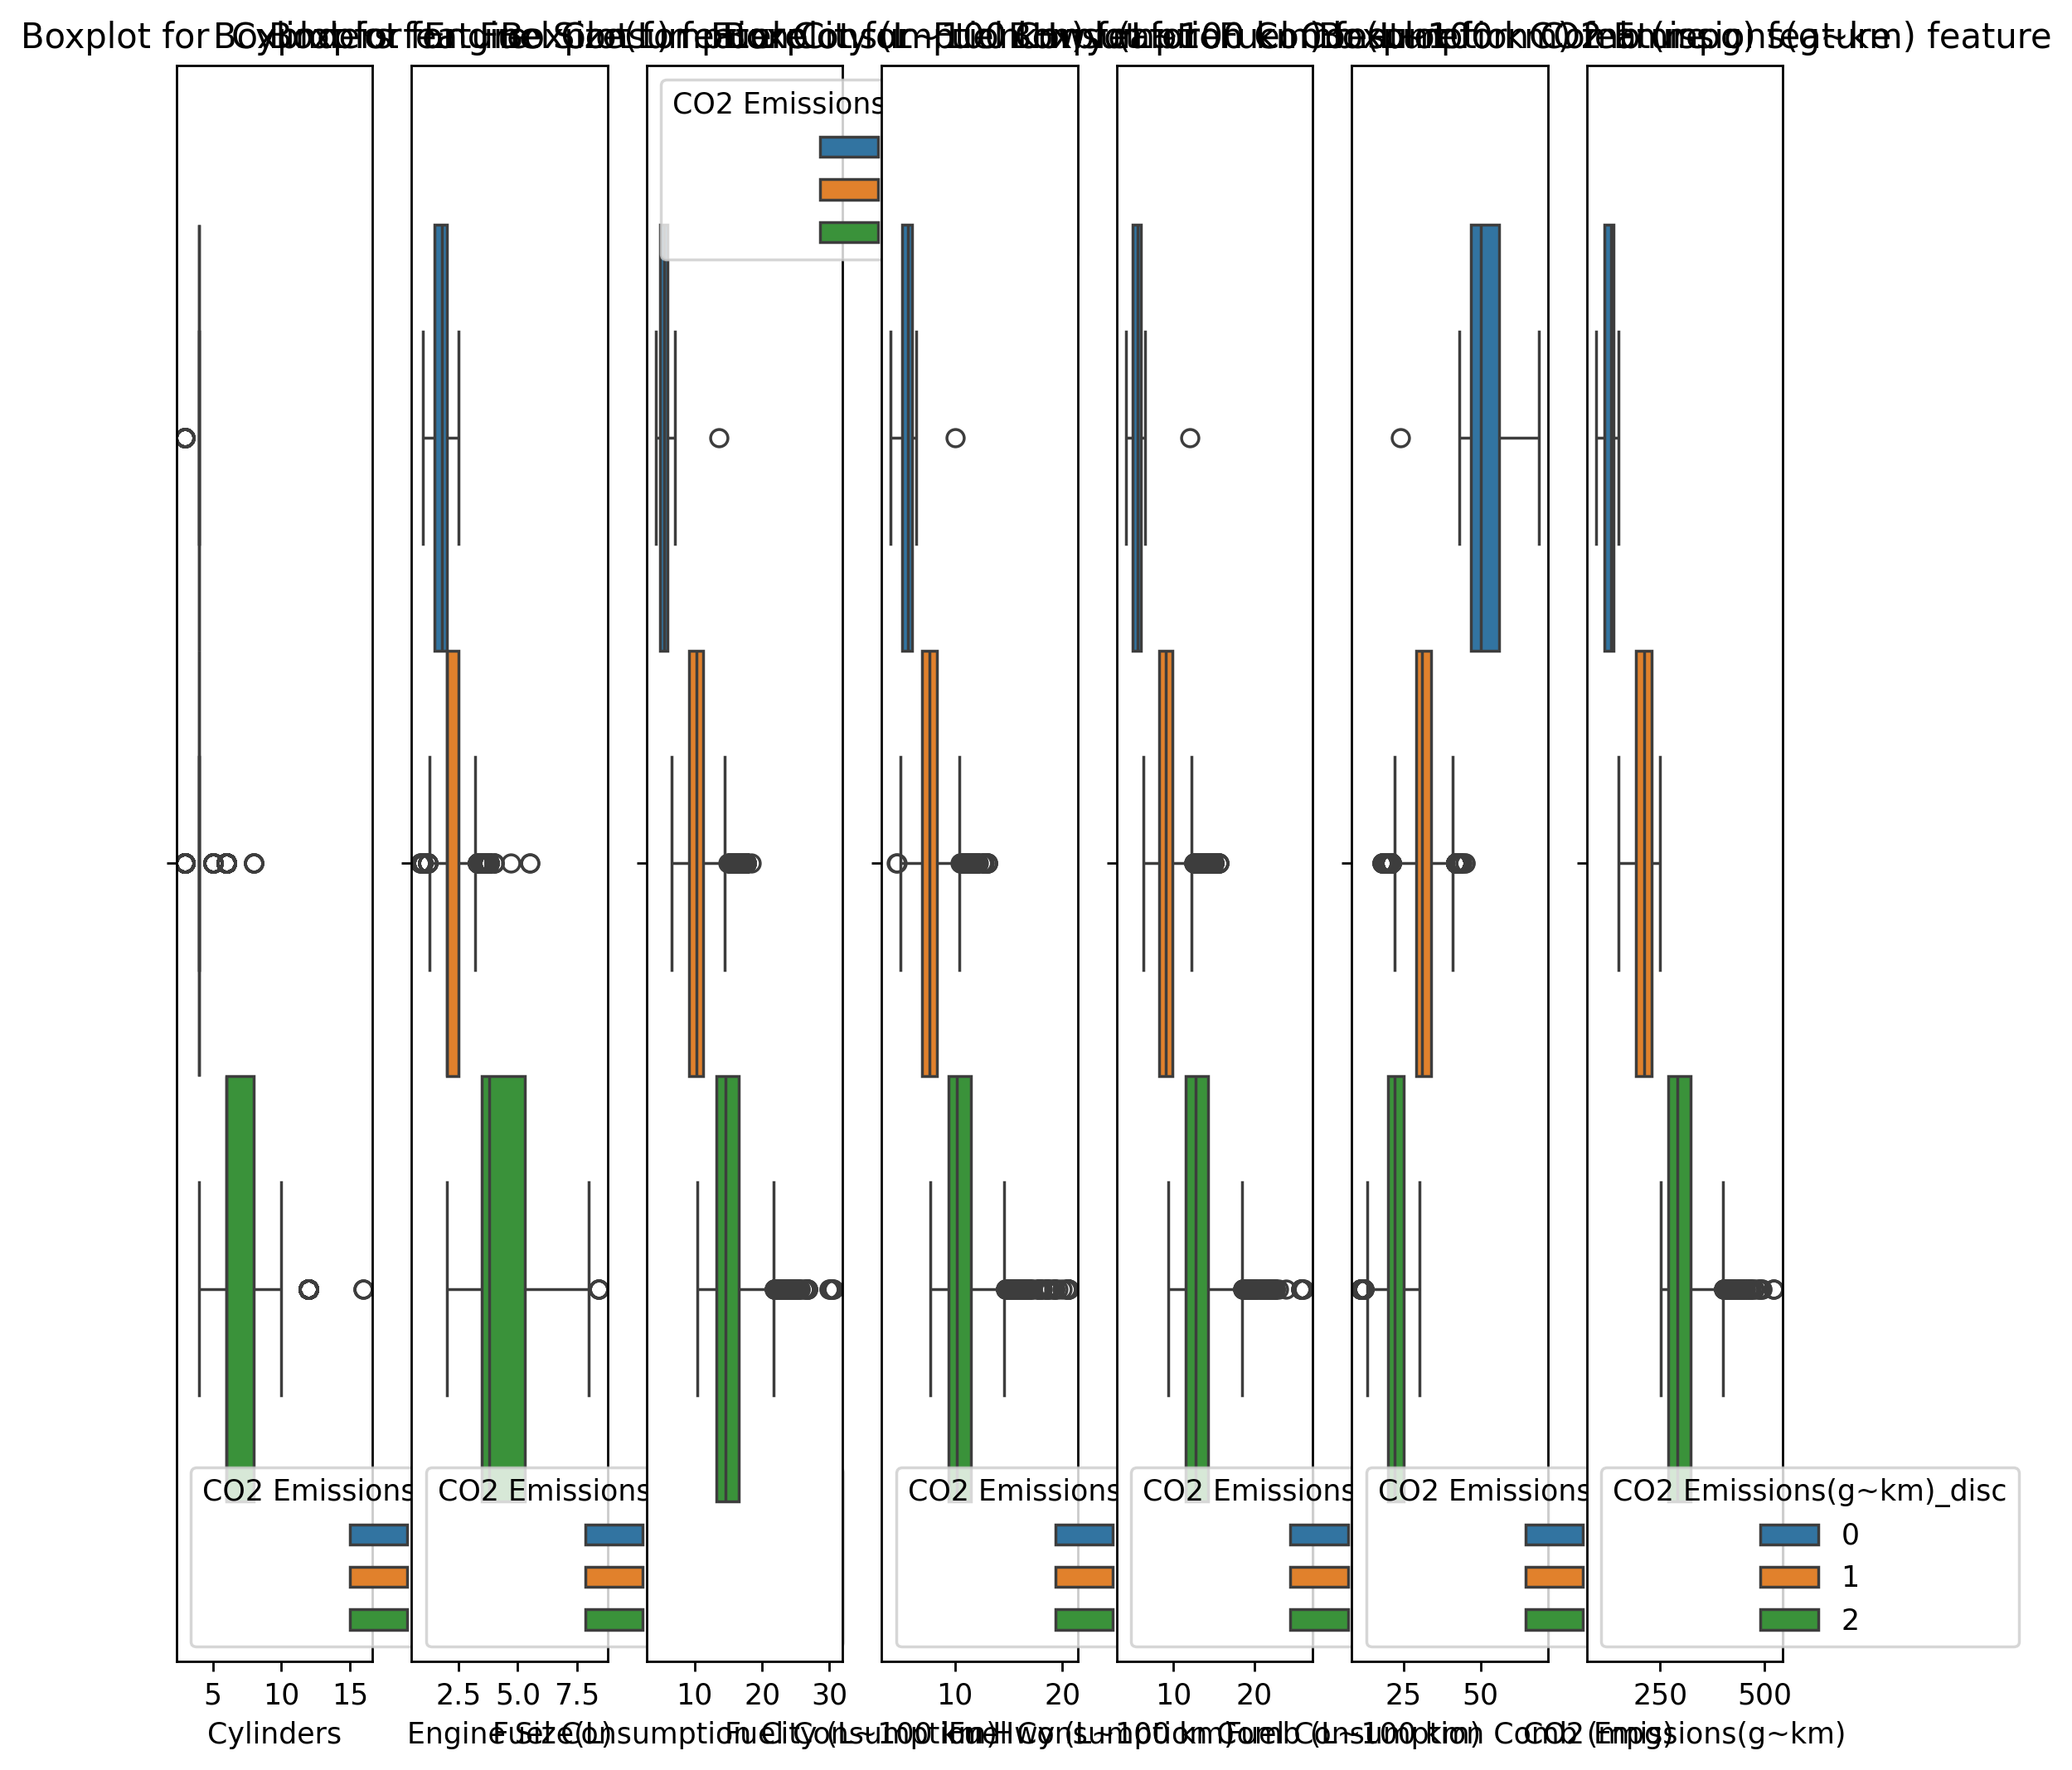

In [3]:
target_var: str = "CO2 Emissions(g~km)" #The target variable's name
file_name:str = "CO2Emission.csv" #The filename


n_splits:int = 3 # How many times we'll be learning each model.
train_size:float = 0.8 #The size of training set
test_size:float  = 1 - train_size #The size of testing set.

progi:tuple[int] = (-float("inf"), 150, 250, float("inf")) #Progi klas emisyjności dwutlenku węgla.

ModelComparator = Classes.ModelComparator(Filename = file_name, target_var = target_var, dtypes = dtypes, 
                                        Models = Models, Models_hipparams = Models_hipparams, 
                                        n_splits = n_splits, train_size  = train_size, test_size = test_size, 
                                        bins = progi, show_plots = True, quartile_discr = False, quartile_classes = None
                                        )

ModelComparator.descriptive_statistics()



### Training-the-models section.

In [4]:
#ModelComparator.train_models()

### Visualization the results section.

In [5]:
#ModelComparator.compare_models()